# **Projet d'économétrie II**

Ce projet se focalisera sur le Chili, une économie émergente dynamique d'Amérique du Sud, en examinant le Taux d'emploi sur la période de 2012 à 2019 et sur le Business Confidence Index (BCI).

Le Chili est reconnu pour sa stabilité économique relative et son rôle en tant que leader régional. Cependant, cette stabilité n'est pas exempte de défis, notamment en matière d'emploi, un indicateur essentiel de la santé économique d'une nation. Les années 2012 à 2019 sont particulièrement intéressantes en raison des changements économiques significatifs survenus pendant cette période, tels que les fluctuations des prix des matières premières et les réformes structurelles.

L'étude du Taux d'emploi au Chili revêt une importance particulière en raison de son impact direct sur la qualité de vie des citoyens et sur la stabilité sociale.

Par ailleurs, le lien entre le Taux d'emploi et le Business Confidence Index (BCI) soulève des interrogations essentielles sur la manière dont la perception des entreprises peut être influencée par les variations du marché du travail. Le BCI, en tant qu'indicateur mesurant la confiance des entreprises dans l'économie, offre un aperçu unique de la manière dont les conditions d'emploi peuvent façonner les perspectives et les décisions des acteurs économiques clés.


Les deux séries dans la période étudiée (2012-2019) comportent 96 observations, en CVS, avec une fréquence mensuelle.

Installation des packages

In [ ]:
install.packages("data.table")
install.packages('ggplot2')
install.packages("readxl")
install.packages("FinTS")
install.packages("urca")
install.packages("googledrive")
install.packages('lmtest')
install.packages('sandwich')
install.packages("moments")
install.packages("tseries")
install.packages("Metrics")
install.packages("tsm")
install.packages("forecast")
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as

## Importation et visualisation des données


On importe les données mensuelles du taux d'emploi du Chili sur le total de la population active, les données sont désaisonnalisées sur dbnomics avec filtre x13 du 01/01/2005 au 01/08/23 (224 observations).

https://db.nomics.world/OECD/DP_LIVE/CHL.EMP.TOT.PC_WKGPOP.M

In [ ]:
library(readxl)  #pour importer fichiers Excel
library(tidyverse)
#tableau valeurs emploi
WKGPOP <- read_xlsx("/content/OECD_DP_LIVE_CHL.EMP.TOT.PC_WKGPOP.M.xlsx",sheet=3)
WKGPOP <- WKGPOP[1:dim(WKGPOP)[1],]
Labor_CL<-WKGPOP[WKGPOP$`Period start day`>="2005-01-01",c("Period start day","Value")]
colnames(Labor_CL)<-c('Date','Emploi')
head(Labor_CL)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Date,Emploi
<dttm>,<dbl>
2005-01-01,54.32333
2005-02-01,54.23883
2005-03-01,54.27069
2005-04-01,54.36582
2005-05-01,54.42151
2005-06-01,54.50815


On visualise les données mensuelles de la Business Confidence Index, Amplitude Adjusted, corrigées des variations saisonnières pour la période de 2005-01-01 à 2023-10-01. (226 observations).

Source: dbnomics, OECD data set
https://db.nomics.world/OECD/DP_LIVE/CHL.BCI.AMPLITUD.LTRENDIDX.M

In [ ]:
#tableau Business Confidence Index
BCI <- read_xlsx("/content/OECD_DP_LIVE_CHL.BCI.AMPLITUD.LTRENDIDX.M.xlsx",sheet=3)
BCI <- BCI[1:dim(BCI)[1],]
colnames(BCI)<-c('Date','Value')
BCI<-BCI[BCI$Date>="2005-01-01",c("Date","Value")]
head(BCI)

Date,Value
<dttm>,<dbl>
2005-01-01,102.5660
2005-02-01,102.4869
2005-03-01,102.4254
2005-04-01,102.3234
2005-05-01,102.2357
2005-06-01,102.3082


# Représentations graphiques

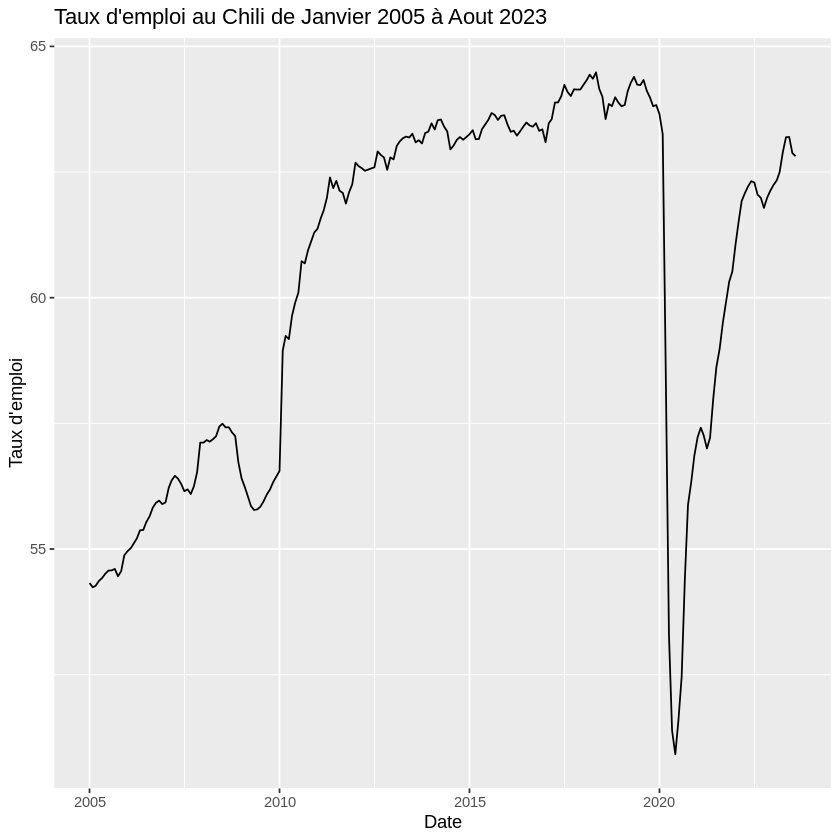

In [ ]:
#Taux d'emploi de la population active au Chili
library(ggplot2)
ggplot(Labor_CL, aes(x = Date, y = Emploi)) +
  geom_line() +
  labs(title = "Taux d'emploi au Chili de Janvier 2005 à Aout 2023", x = "Date", y = "Taux d'emploi")


Business Confidence Index du Chili

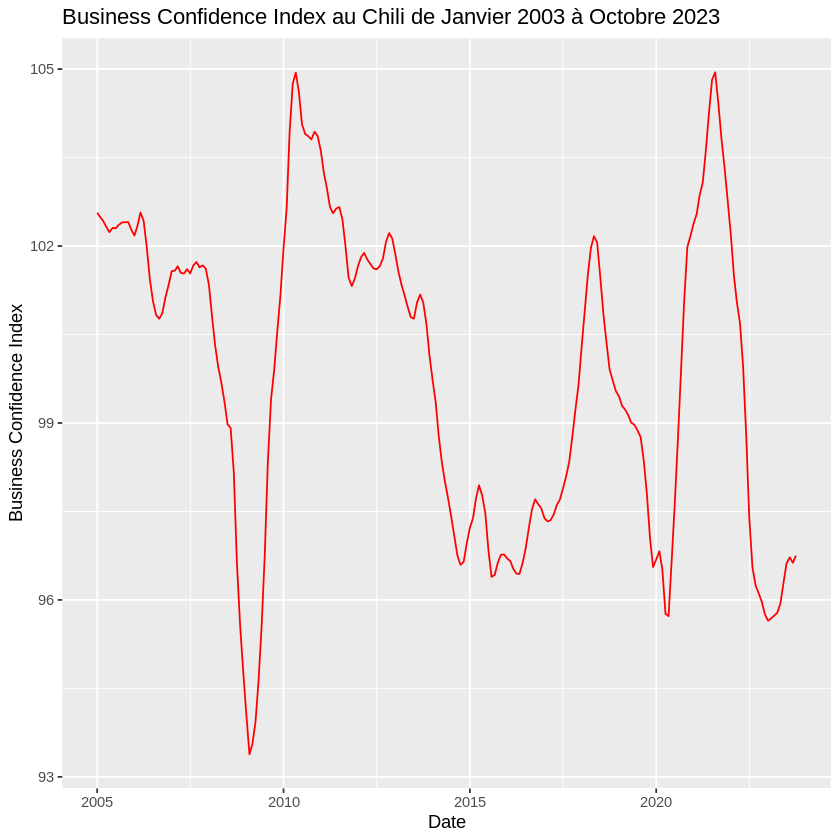

In [ ]:
library(ggplot2)
ggplot(BCI, aes(x = Date, y = Value)) +
  geom_line(color="red") +
  labs(title = "Business Confidence Index au Chili de Janvier 2003 à Octobre 2023", x = "Date", y = "Business Confidence Index")

# Etude de la stationnarité du taux d'emploi

### Estimation sans la période Covid : 2012-01:T1 à 2019:T12

On va réduire la période étudiée, pour simplifier l'étude de la stationarité. L'emploi a subi des forts chocs lors de la crise de 2008 et 2009, ainsi que la chute brutale en 2020 lié au confinement et la crise Covid-19.

Pour étudier la stationnarité de la série on va étudier la période entre 2012 et 2019.

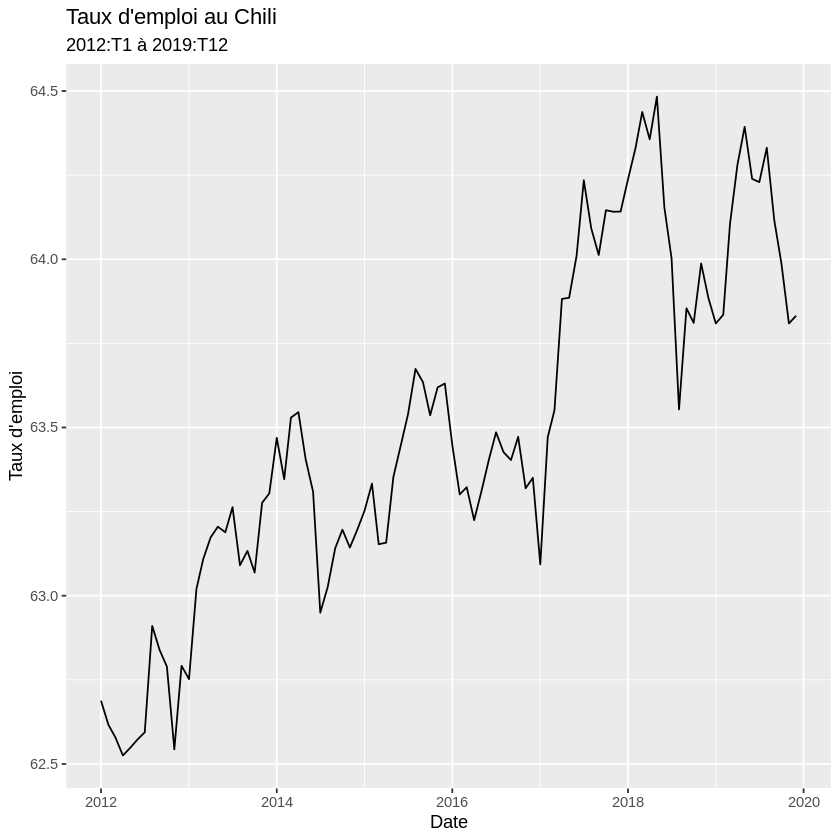

In [ ]:
library(dplyr)
  Labor_CL2 <- Labor_CL %>%
  filter(Date >= as.Date("2012-01-01") & Date <= as.Date("2019-12-01"))
Taux_emploi_avant_Covid <- ggplot(data = Labor_CL2, aes(x = Date, y = Emploi))  +geom_line(color='black')
Taux_emploi_avant_Covid+labs(x="Date",y="Taux d'emploi",title = "Taux d'emploi au Chili",subtitle = "2012:T1 à 2019:T12")


In [ ]:
library(FinTS)
stat_labor <- FinTS.stats(Labor_CL2$Emploi)
stat_labor

Warning message in FinTS.stats(Labor_CL2$Emploi):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,96,63.49331,0.5123488,NA,NA,62.52511,64.48327


Le graphique nous montre une tendance à la hausse de l'emploi dans la période, avec des variations autour de la trend et une croissance de 2 points de pourcentage, de 62,5 à 64,5% dans la période étudiée.
On ne peut pas tirer des conclusions sur la stationnarité du processus.

**Autocorrélogrammes de l'emploi**

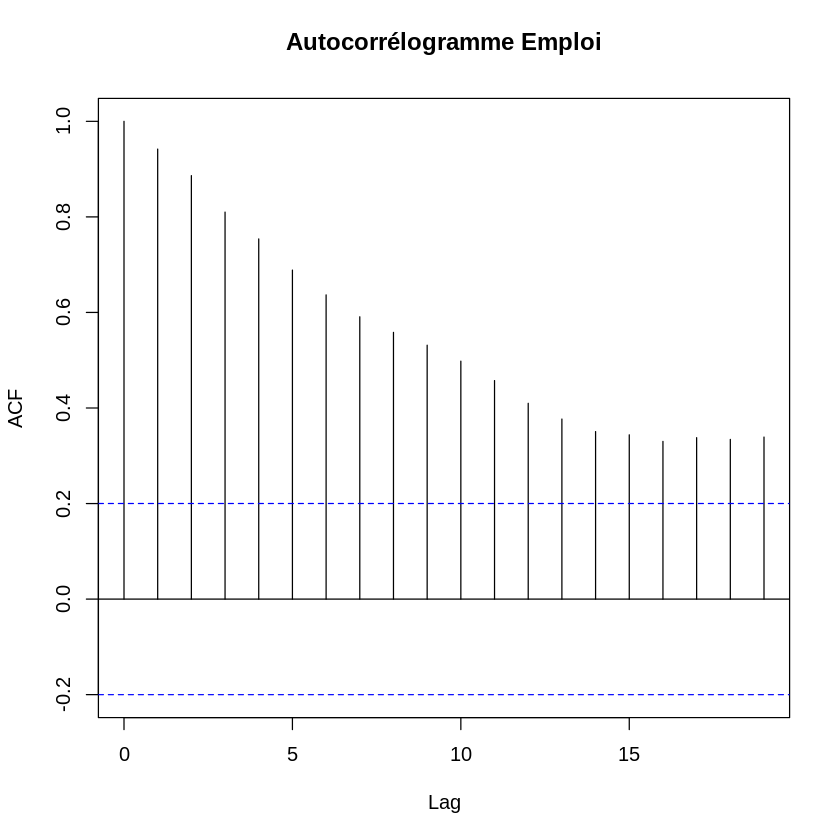

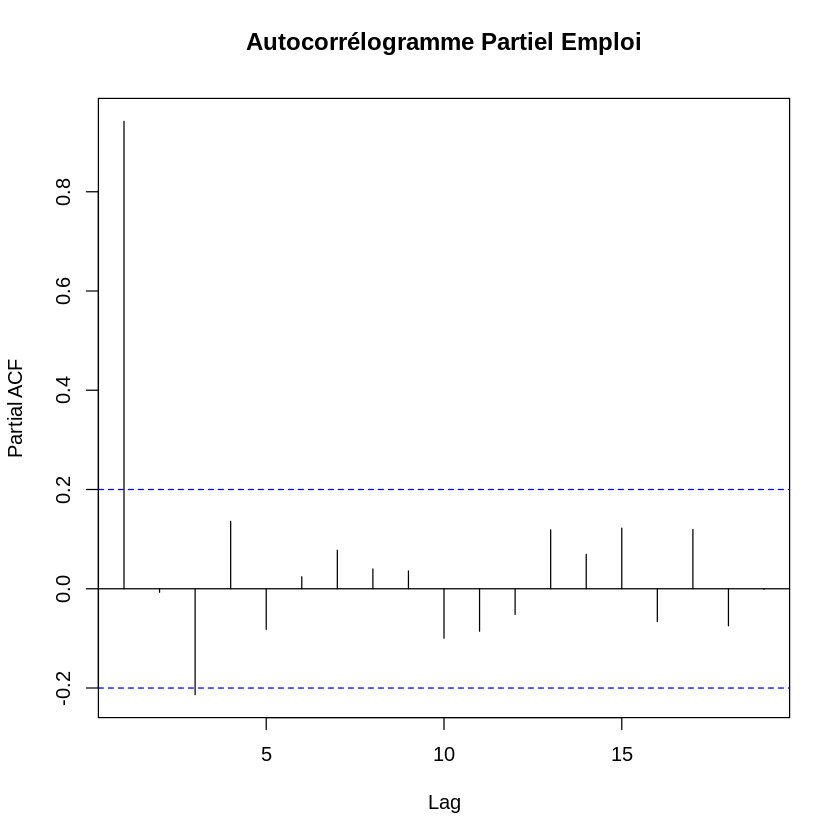

In [ ]:
acf_result <- acf(Labor_CL2$Emploi, main = "Autocorrélogramme Emploi")
pacf_result <- pacf(Labor_CL2$Emploi, main = "Autocorrélogramme Partiel Emploi")

Les autocorrélations sont positives et significatives, et elles décroissent lentement, ce qui semble indiquer la forme d'une AR. On a une PACF qui est significative pour le premier et troisième retard. Néanmoins on ne tire aucune conclusion sur la stationnarité du modèle, on continue avec les test de stationnarité.

## **Test de Dickey-Fuller de racine unitaire**

**Etape 1 : Modèle 3 avec constante et tendance déterministe**
On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

Test de Racine Unitaire:

* H0: p=0
* H1: p < o

Si la statistique du test est inférieur aux seuils critiques au risque de première espece choisi, on rejette H0 et la série est stationnaire.

In [ ]:
library(urca)
adf1<-ur.df(y = Labor_CL2$Emploi,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31676 -0.10046  0.01293  0.09864  0.30914 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 13.584764   4.819120   2.819  0.00605 **
z.lag.1     -0.216080   0.076845  -2.812  0.00618 **
tt           0.003078   0.001374   2.240  0.02782 * 
z.diff.lag1  0.112426   0.107639   1.044  0.29937   
z.diff.lag2  0.278923   0.105881   2.634  0.01010 * 
z.diff.lag3 -0.170673   0.109101  -1.564  0.12163   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1405 on 81 degrees of freedom
Multiple R-squared:  0.2034,	Adjusted R-squared:  0.1543 
F-statistic: 4.137 on 5 and 81 DF,  p-value: 0.002134


Value of test-statistic is: -2.8119 3.

Hypothèse nulle H0 : La série temporelle a une racine unitaire avec une constante et une tendance, et est donc non stationnaire.

* t(ADF)= -2.812  
* critical value at 5% = -3.45
* Donc t(ADF)> -3.45

On ne peut pas rejetter l'hypothèse nulle de racine unitaire.

On test pour la tendance déterministe:

* H0: b=0
* H1: b=/0

t(^b)= 2.240

Le seuil de rejet qui figure la table de Dickey Fuller pour t^b  est égal à 3.14 pour un risque de première espèce de 5% et 100 observations.

|t(^b)|<3.14

On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative.

On passe à la deuxième étape

# *Etape 2: Modèle 2 avec constante *

Test de racine unitaire avec constante
* H0: p=0  
* H1: p<0

Si on rejette H0 la série est stationnaire

In [ ]:
adf2<-ur.df(y = Labor_CL2$Emploi ,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35355 -0.09235  0.00800  0.09550  0.31985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.91500    2.19489   1.784   0.0782 .
z.lag.1     -0.06139    0.03454  -1.778   0.0792 .
z.diff.lag1  0.03430    0.10430   0.329   0.7431  
z.diff.lag2  0.19298    0.10108   1.909   0.0597 .
z.diff.lag3 -0.26039    0.10394  -2.505   0.0142 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1439 on 82 degrees of freedom
Multiple R-squared:  0.1541,	Adjusted R-squared:  0.1128 
F-statistic: 3.734 on 4 and 82 DF,  p-value: 0.007668


Value of test-statistic is: -1.7775 1.9575 

Critical values for test statistics: 
      1pct  5pct 10pct
ta

t(adf)= -1.778

Les seuils de rejet figurent sur la ligne tau3 = -2.89  pour le risque de première espèce de 5%.

t(adf)> -2.89

On ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèce de 1% et 10%.

On test pour une constante déterministe
* H0: c=0
* H1: c=/0

Le t-stat de la tendance déterministe est égal à
t^c = 1.974

Le seuil de rejet de la table Dickey Fuller de  tc^  est égal à 2.86 pour un risque de première espèce de 5% et T=100 observations.
On a donc |t^c|< 2.86: on ne rejette pas l'hypothèse nulle que la constante n'est pas significative.
--> potentialmente no es significativa H0

On passe au modèle 1

#Etape 3: Modèle 1 sans constante ni tendance déterministe

In [ ]:
adf3<-ur.df(y = Labor_CL2$Emploi,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36698 -0.08909  0.00930  0.09321  0.31899 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
z.lag.1      0.0002109  0.0002495   0.845  0.40031   
z.diff.lag1  0.0132361  0.1049803   0.126  0.89997   
z.diff.lag2  0.1736700  0.1018074   1.706  0.09177 . 
z.diff.lag3 -0.2869354  0.1042142  -2.753  0.00725 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1458 on 83 degrees of freedom
Multiple R-squared:  0.1262,	Adjusted R-squared:  0.0841 
F-statistic: 2.997 on 4 and 83 DF,  p-value: 0.02309


Value of test-statistic is: 0.8454 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


* t(ADF)= 0.845
* Les seuils de rejet figurent sur la ligne tau3: -1.95
* t(adf)= 0.845 > -1.95

La statistique du test supérieure au seuil de rejet pour le risque de première espèce de 5% : on ne rejette pas l'hypothèse nulle de racine unitaire.


**Conclusion sur les résultats de tests ADF**


A l'issus de la séquence des tests ADF on conclut que la série du taux d'emploi du Chili n'est pas stationnaire.
On a une série UR  X~I(1)

# **Test de stationnarité de KPSS**

Le test de stationnarité:
* HO: σ𝜀 = 0
* H1: σ𝜀 > 0

On applique le test de KPSS. Dans ce cas l'hypothèse nulle est que la série est stationnaire autour d'une tendance déterministe ou autour d'une constante.

Dans la spécification du test kpss :

*   On choisit l'option "long" , les fonctions ACF montre des pics significatifs sur plusieurs retards, cela suggère une autocorrélation importante.

**Test de stationnarité autour d'une tendance déterministe**

In [ ]:
kpss_tau<-ur.kpss(y=Labor_CL2$Emploi,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 11 lags. 

Value of test-statistic is: 0.0559 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


test-statistic = 0.0559  < critical value at 10%, 5%, 2.5% et 1%
On ne peut pas rejetter pas l'hypothèse nulle de stationnarité du taux d'emploi autour d'un tendance déterministe.



 **Test de stationnarité autour d'une constante**

In [ ]:
kpss_mu<-ur.kpss(y=Labor_CL2$Emploi,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 11 lags. 

Value of test-statistic is: 0.8157 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


test-statistic = 0.8157 > critical value at 10%, 5%, 2.5% et 1%

On rejette l'hypothèse de stationnarité autour d'une constante.

**Conclusion générale sur les test de racine unitaire et de stationnarité**

On voit que les conclusions des tests ADF et KPSS sont contradictoires, ADF suggerent une non stationnarité de la série en raison d'une racine unitaire, mais le test KPSS suggère une stationnarité autour d'une tendance déterministe.


On va supposer que la série à une UR et la différentier la série pour la stationnariser.

# Differencier la série


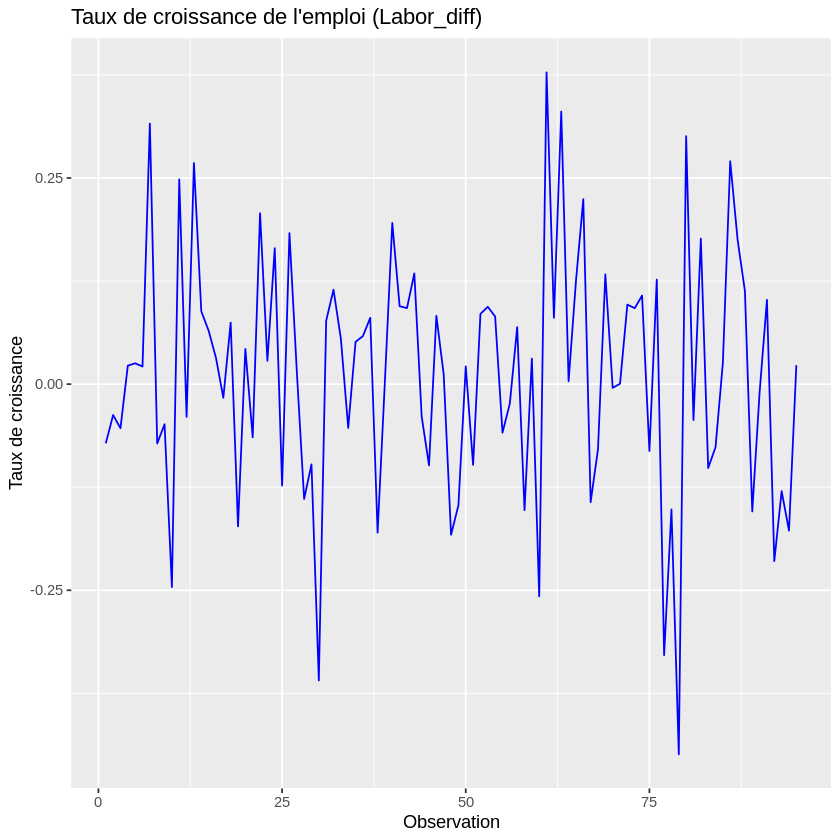

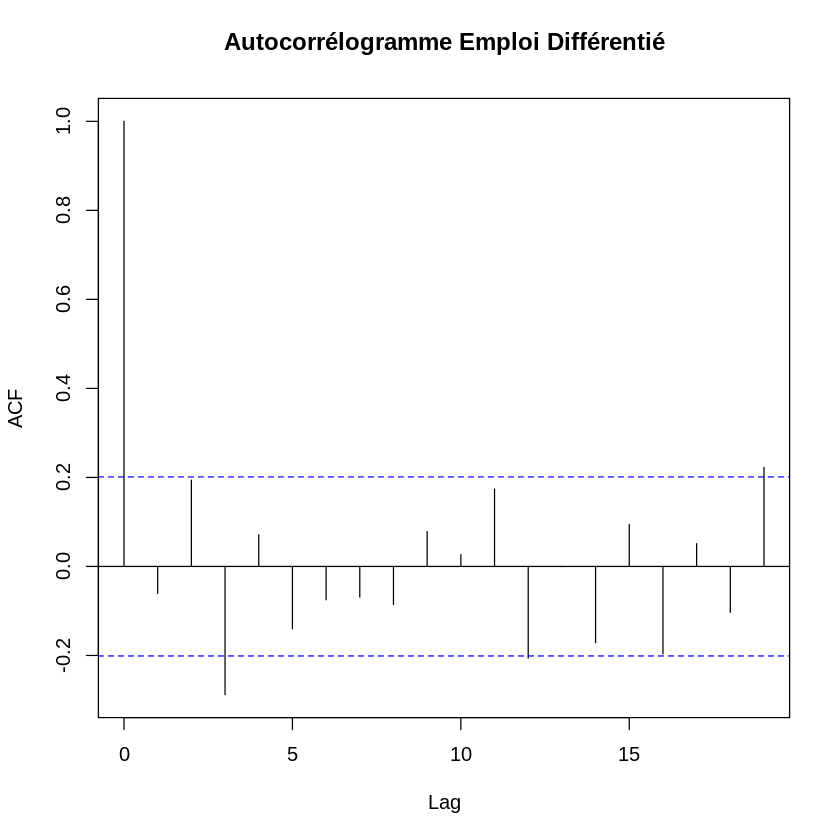

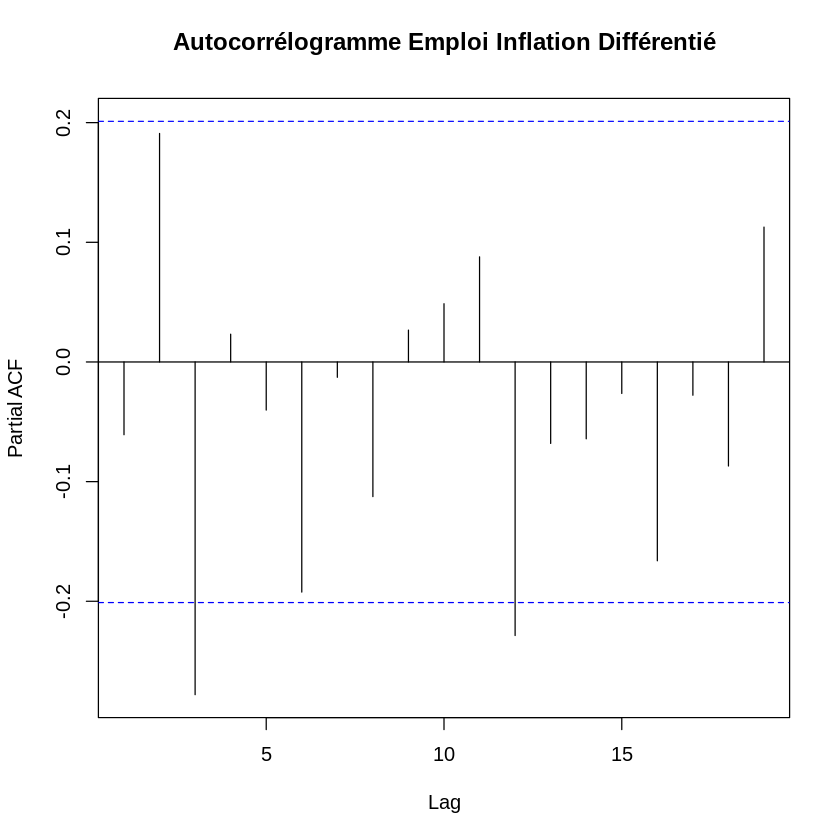

In [ ]:
Labor_diff <- diff(Labor_CL2$Emploi)
#Graphique
ggplot(data = data.frame(Labor_diff)) +
  geom_line(aes(x = seq_along(Labor_diff), y = Labor_diff), color = "blue") +
  labs(title = "Taux de croissance de l'emploi (Labor_diff)", x = "Observation", y = "Taux de croissance")
#Construction ACF
acf_result_diff <- acf(Labor_diff, main = "Autocorrélogramme Emploi Différentié")
# Construction du PACF
pacf_result_diff <- pacf(Labor_diff, main = "Autocorrélogramme Emploi Inflation Différentié")

La forme des ACF et PACF montre une composante MA:

* ACF: Valeurs significatives au lag 1 et 3
* PACF: On a seulement un pic significatif au lag 3

Cela peut suggerer une structure ARMA (1,3)

In [ ]:
library(FinTS)
stat_labor_diff <- FinTS.stats(Labor_diff)
stat_labor_diff

Warning message in FinTS.stats(Labor_diff):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,95,0.01204548,0.1502352,NA,NA,-0.4489466,0.3781075


Une analyse du graphique semble indiquer que c'est une série stationnaire.

# **Test de racine unitaire Dickey-Fuller**

Pour vérifier la stationnarité de notre série différnenciée on va procéder de nouveau au test augmenté de Dickey-Fuller.

Étape 1: Modèle 3 avec constante et tendance déterministe

In [ ]:
library(urca)
adf1<-ur.df(y = Labor_diff,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35419 -0.09061  0.01064  0.09583  0.31883 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0403266  0.0367395   1.098  0.27562    
z.lag.1     -1.0959973  0.1771233  -6.188 2.37e-08 ***
tt          -0.0004952  0.0006386  -0.775  0.44033    
z.diff.lag1  0.1003577  0.1534295   0.654  0.51490    
z.diff.lag2  0.2878538  0.1048214   2.746  0.00743 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1465 on 81 degrees of freedom
Multiple R-squared:  0.5909,	Adjusted R-squared:  0.5707 
F-statistic: 29.25 on 4 and 81 DF,  p-value: 4.745e-15


Value of test-statistic is: -6.1878 12.7898 19.1846 

Critical values for test

* t(ADF)= -6.188
*  critical value at 5% = -3.45
* t(ADF)<-3.45

On rejette donc l'hypothèse nulle de racine unitaire.

La p-value est inférieure à 0.05, cela renforce la conclusion selon laquelle on peut rejette l'hypothèse nulle.

Pour la tendance significative:
* t(tt)=-0.775
* seuil critique sur la table de Student
* |t(tt)|< 1,95996

On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative.

On passe au modèle 2

**Etape 2: Modèle 2 avec constante **

In [ ]:
adf2<-ur.df(y = Labor_diff,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36357 -0.08656  0.00797  0.09138  0.31640 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01468    0.01595   0.920  0.36025    
z.lag.1     -1.08507    0.17613  -6.161 2.57e-08 ***
z.diff.lag1  0.09420    0.15285   0.616  0.53940    
z.diff.lag2  0.28463    0.10448   2.724  0.00788 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1461 on 82 degrees of freedom
Multiple R-squared:  0.5879,	Adjusted R-squared:  0.5728 
F-statistic: 38.99 on 3 and 82 DF,  p-value: 9.291e-16


Value of test-statistic is: -6.1605 18.9763 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  

* t(adf)= -6.161
* tau2 (5%) = -2.89
* t(adf)< tau2

On rejette donc l'hypothese nulle de racine unitaire. De plus la p-value est inférieur à 0.05  (=9.291e-16), on rejette donc l'hypothese de racine unitaire.

On teste la significativité de la constante:
* t(Intercept) = t(^c) = 0.92
* seul critique sur la table de Student pour un risque de premi`re espèce de 5%: 1,95996
* |t(Intercept)| < 1,95996
On ne rejette pas l'hypothèse nulle que la constante n'est pas significative.

**Etape 3: Modèle sans constante ni tendance déterministe**

In [ ]:
adf3<-ur.df(y = Labor_diff,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34644 -0.07449  0.02252  0.10500  0.33375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -1.06048    0.17393  -6.097 3.27e-08 ***
z.diff.lag1  0.07495    0.15127   0.495  0.62157    
z.diff.lag2  0.27433    0.10379   2.643  0.00982 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.146 on 83 degrees of freedom
Multiple R-squared:  0.5836,	Adjusted R-squared:  0.5686 
F-statistic: 38.78 on 3 and 83 DF,  p-value: 9.151e-16


Value of test-statistic is: -6.0971 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


* t(adf) = -6.097
* tau1 (5pct) =-1.95
* t(adf)< tau1

et p-value = 9.151e-16 < 0.05

On rejette donc l'hypothèse nulle de racine unitaire.

**Conclusion du test**

La série c'est une série stationnaire du type DS sans trend ni drift I(0)

# Test KPSS

**Etape 1: Test de stationnarité autour d'une tendance déterministe**

In [ ]:
kpss_tau<-ur.kpss(y=Labor_diff,type="tau",lags="short")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0376 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


* test-statistic =0.0376
* critical value at 5% = 0.146
* t-stat < critical-v

On ne rejette pas l'hypothèse nulle de stationnarité autour d'une tendance déterministe. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 2.5% et 1%.

**Test de stationnarité autour d'une constante**

In [ ]:
kpss_mu<-ur.kpss(y=Labor_diff,type="mu",lags="short")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0623 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


* t.stat= 0.0623
* critical.v = 0.463
* t.stat < critical.v

On ne rejette pas l'hypothèse de stationnarité avec une constante. On ne peut rejeter non plus l'hypothèse de stationnarité pour les risques de première espèce de 1%, 2.5% et 10%

Le non rejet des hypothèses nulles suggère que la série différenciée est stationnaire.

## Conclusion sur la stationnarité de Labor_diff
Les test Dickey Fuller et KPSS suggèrent que notre série différenciée est stationnaire.

# Etude de la stationnarité du Business Confidence Index

Warning message in FinTS.stats(BCI2$Value):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,96,99.03389,1.942013,NA,NA,96.39078,102.2185


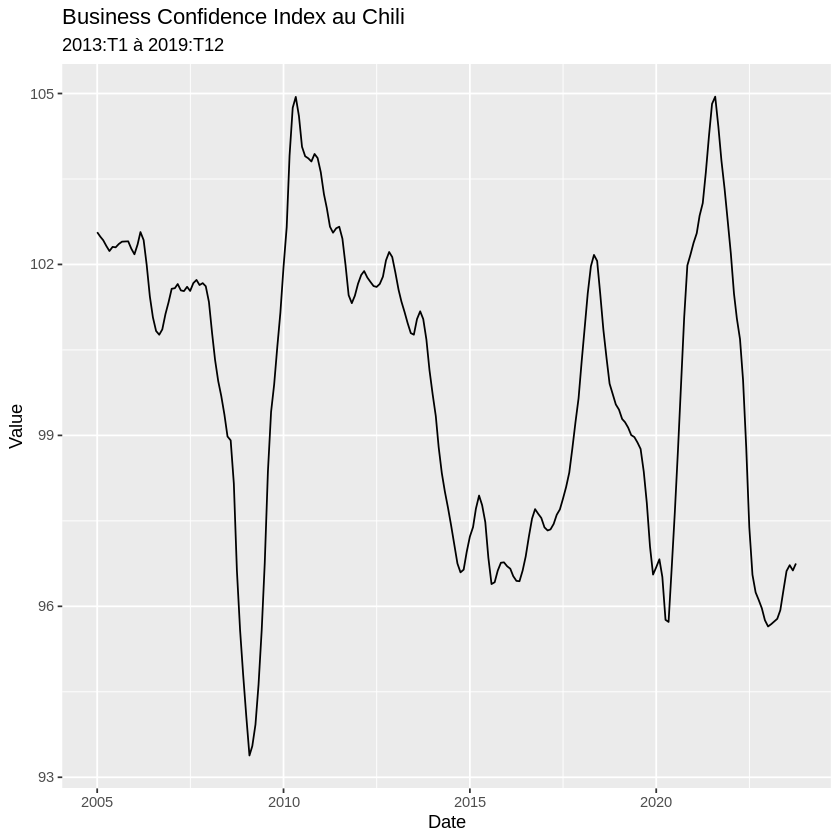

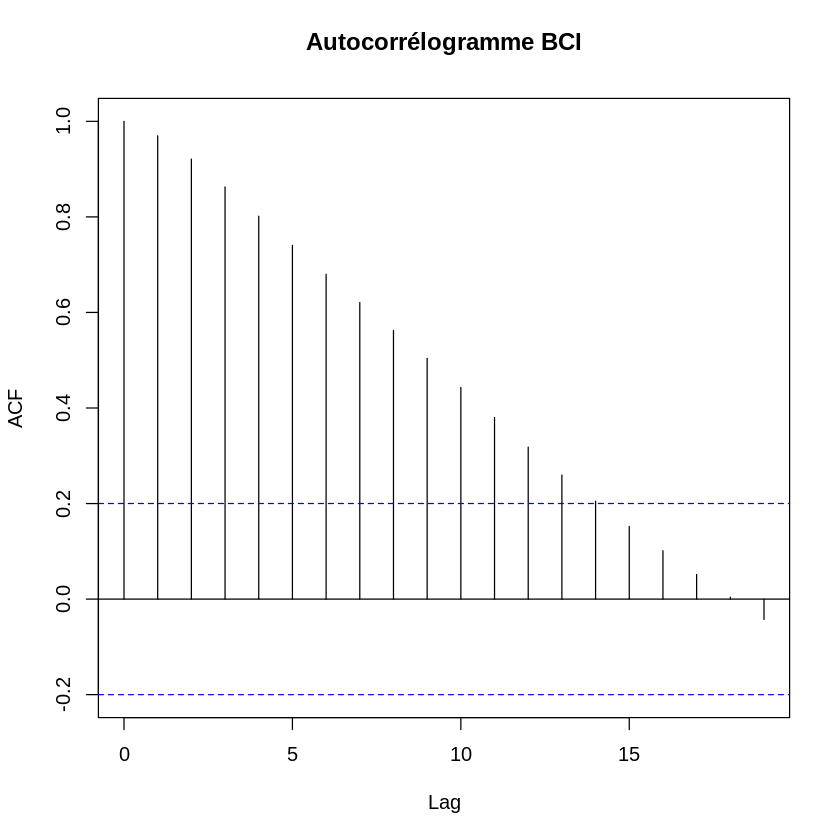

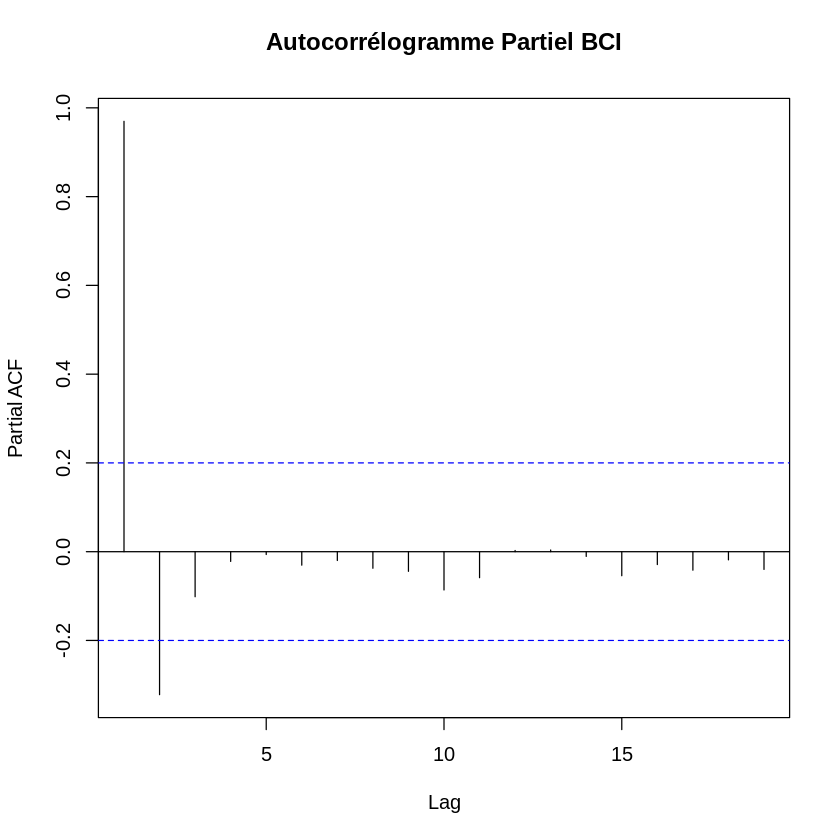

In [ ]:
#Etude de la période hors crises
library(dplyr)
  BCI2 <- BCI %>%
  filter(Date >= as.Date("2012-01-01") & Date <= as.Date("2019-12-01"))
BCI_PLOT_2 <- ggplot(data = BCI, aes(x = Date, y = Value))  + geom_line ()
BCI_PLOT_2+labs(x="Date",y="Value",title = "Business Confidence Index au Chili",subtitle = "2013:T1 à 2019:T12")

#Résumé statistique
library(FinTS)
stat_bci <- FinTS.stats(BCI2$Value)
stat_bci

#Etude de la ACF et PACF

acf_result <- acf(BCI2$Value, main = "Autocorrélogramme BCI")
pacf_result <- pacf(BCI2$Value, main = "Autocorrélogramme Partiel BCI")


Une inspection visuelle de la période ne nous permet pas conclure sur la stationnarité de la série.
La forme des ACF et PACF semble montrer un modèle AR(2)

**Test de stationnarité de Dickey Fuller**

1. Etape 1: Modèle 3, avec constante et tendance déterministe
H0: p=0
H1: p< 0

Si la valeur du t-stat < seuils critiques de DF, on rejette l'hypothèse nulle de racine unitaire.

In [ ]:
library(urca)
adf1<-ur.df(y= BCI2$Value,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33789 -0.09090  0.00013  0.09570  0.38290 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.663e+00  8.590e-01   1.936   0.0563 .  
z.lag.1     -1.697e-02  8.624e-03  -1.968   0.0525 .  
tt           3.875e-06  6.117e-04   0.006   0.9950    
z.diff.lag1  1.246e+00  9.715e-02  12.831  < 2e-16 ***
z.diff.lag2 -4.535e-01  1.022e-01  -4.439 2.79e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1397 on 82 degrees of freedom
Multiple R-squared:  0.8079,	Adjusted R-squared:  0.7986 
F-statistic: 86.23 on 4 and 82 DF,  p-value: < 2.2e-16


Value of test-statistic is: -1.9677 1.622 2.0075 

Critical values for test st

* t(adf) = -1.968
* tau3 = -3.45
* t(adf)>tau3

On ne peut pas rejetter donc l'hypothèse nulle de racine unitaire.

Pour la tendance significative:
H0: c=0 ,
H1: c=/0

* t(tt)=0.006
* Seuil critique sur la table de Dickey Fuller
* |t(tt)|< 3,14
On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative. On passe au modèle 2

2. Etape 2: Modèle 2, avec constante déterministe

In [ ]:
adf2<-ur.df(y = BCI2$Value,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33794 -0.09086  0.00026  0.09583  0.38296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.664078   0.832573   1.999   0.0489 *  
z.lag.1     -0.016980   0.008423  -2.016   0.0470 *  
z.diff.lag1  1.246373   0.096161  12.961  < 2e-16 ***
z.diff.lag2 -0.453404   0.100440  -4.514 2.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1389 on 83 degrees of freedom
Multiple R-squared:  0.8079,	Adjusted R-squared:  0.801 
F-statistic: 116.4 on 3 and 83 DF,  p-value: < 2.2e-16


Value of test-statistic is: -2.0159 2.4627 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.7

* t(adf)= -2.016

Les seuils de rejet figurent sur la ligne tau3 = -2.89 pour le risque de première espèce de 5%.

* t(adf)> -2.89

On ne rejette pas l'hypothèse nulle de racine unitaire. On ne rejette pas non plus l'hypothèse nulle de racine unitaire pour les risques de première espèce de 1% et 10%.

On test pour une constante déterministe

H0: c=0
H1: c=/0

* t(intercept)=1.999
Le seuil de rejet de la constante déterministe sur la table de Dickey Fuller est égal à t^c = 2,86 pour un risque de première espèce de 5% et T=100 observations.

On a donc |t^c|< 2.86: on ne rejette pas l'hypothèse nulle que la constante n'est pas significative. --> potentialmente no es significativa H0

On passe au modèle 1

3. Etape 3: Modèle 1, sans constante ni tendance

In [ ]:
adf3<-ur.df(y = BCI2$Value ,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32149 -0.09485  0.00352  0.09389  0.37737 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.0001475  0.0001556  -0.948    0.346    
z.diff.lag1  1.2842747  0.0959388  13.386  < 2e-16 ***
z.diff.lag2 -0.5036954  0.0989558  -5.090 2.16e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1413 on 84 degrees of freedom
Multiple R-squared:  0.806,	Adjusted R-squared:  0.7991 
F-statistic: 116.3 on 3 and 84 DF,  p-value: < 2.2e-16


Value of test-statistic is: -0.9479 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


* t(adf) = -0.948
* tau1 (5pct) = -1.95
* t(adf)> tau1
et p-value = 9.151e-16 < 0.05

On ne rejette pas donc l'hypothèse nulle de racine unitaire.

Conclusion du test: La série n'est pas stationnaire, avec Yt~I(1)

# Différenciation de la série BCI2 pour la stationnariser

Warning message in FinTS.stats(BCI2_diff):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,95,-0.05373063,0.2997816,NA,NA,-0.7598169,0.6606792


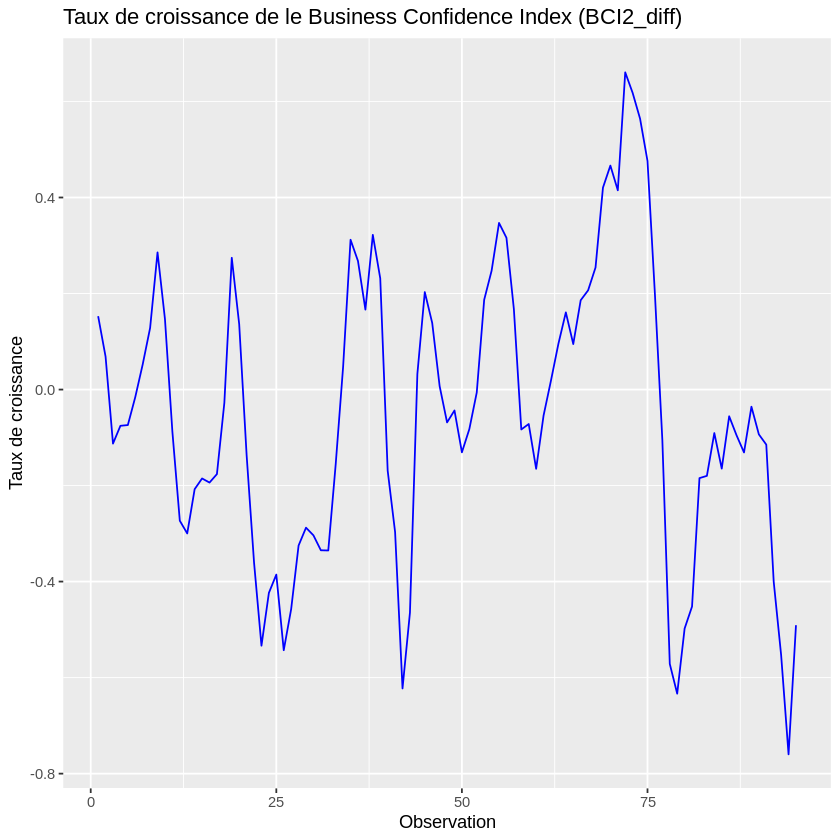

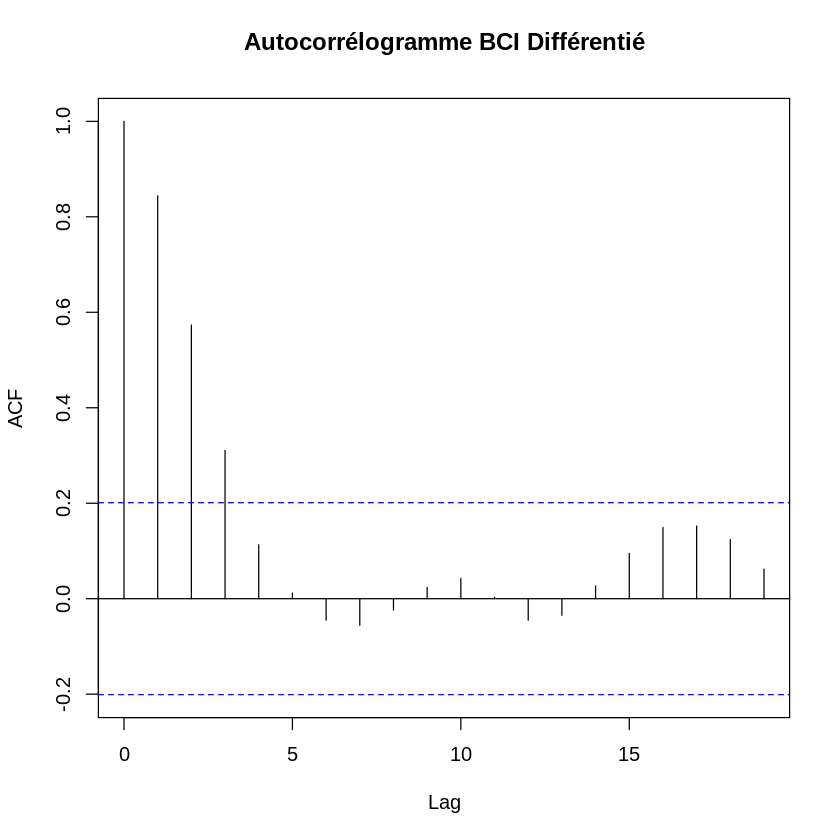

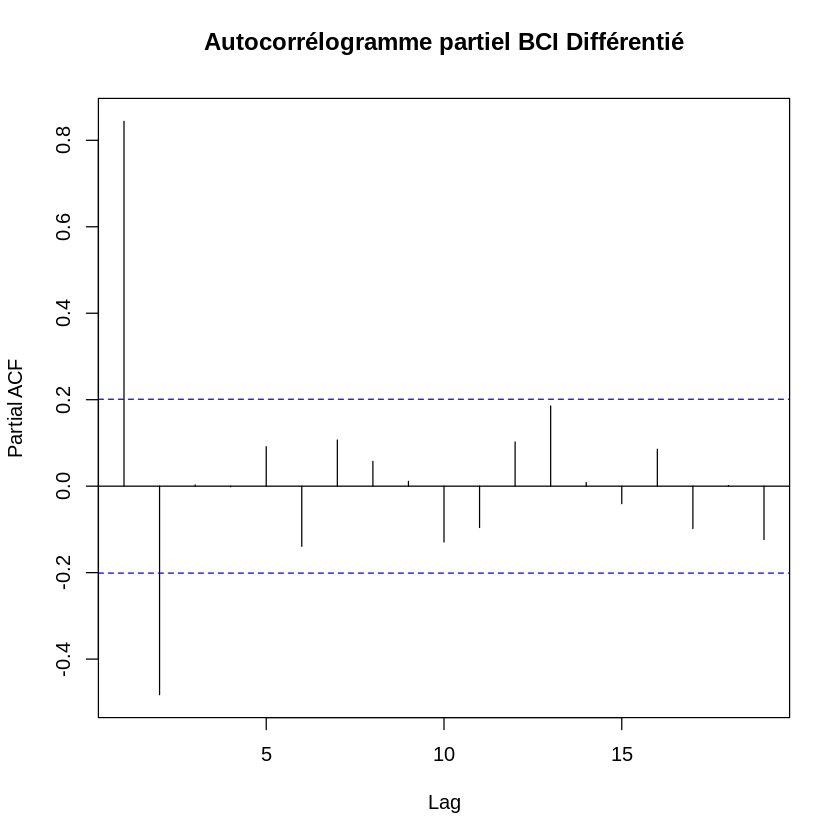

In [ ]:
BCI2_diff <- diff(BCI2$Value)

#Graphique
ggplot(data = data.frame(BCI2_diff)) +
  geom_line(aes(x = seq_along(BCI2_diff), y = BCI2_diff), color = "blue") +
  labs(title = "Taux de croissance de le Business Confidence Index (BCI2_diff)", x = "Observation", y = "Taux de croissance")

#Résumé statistique
library(FinTS)
stat_bci_diff <- FinTS.stats(BCI2_diff)
stat_bci_diff

#Construction ACF
acf_result_diff <- acf(BCI2_diff, main = "Autocorrélogramme BCI Différentié")
# Construction du PACF
pacf_result_diff <- pacf(BCI2_diff, main = "Autocorrélogramme partiel BCI Différentié")

Une exploration visuelle semble montrer un procesus avec tendance.
 * (ACF) décroissante
 * (PAC) avec des pics significatifs au lag 1 et 2.

 Cela peut suggérer un modèle AR(2)

# Test Dickey-Fuller pour la série BCI2_diff

Etape 1: Modèle 3

In [ ]:
#Etape 1

library(urca)
adf1<-ur.df(y= BCI2_diff,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32986 -0.09166  0.00908  0.08469  0.37427 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0353275  0.0357047  -0.989    0.325    
z.lag.1     -0.2254650  0.0526620  -4.281 5.01e-05 ***
tt           0.0003708  0.0006203   0.598    0.552    
z.diff.lag   0.5055115  0.0997273   5.069 2.43e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1417 on 82 degrees of freedom
Multiple R-squared:  0.2897,	Adjusted R-squared:  0.2637 
F-statistic: 11.15 on 3 and 82 DF,  p-value: 3.27e-06


Value of test-statistic is: -4.2814 6.1561 9.1753 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.1

* t(adf)=-4.281
* tau3(5pct) = -3.45
t(adf)< tau3

On rejette donc l'hypothèse nulle de racine unitaire. On fait un test bilatéral pour vérifier la présence d'une tendance déterministe.

* t(tt)= 0.598
* seuil critique sur table de Student pour un risque de première espèce de 5% : 1,95996
On a |t(tt)|< 1,95996
On rejette donc l'hypothèse nulle de que la tendance n'est pas significative.

On fait un test bilatéral pour voir si la constante est significative.

* t(intercept)= -0.989
* seuil critique sur table de Student pour un risque de première espèce de 5% : 1,95996
*|t(intercept)| < 1,95996

On rejette donc l'hypothèse nulle de que la constante n'est pas significative.

*Conclusion: On a alors une série stationnaire avec une tendance et une constante significatives du type : △Yt ~ I(0)+c+T

Yt est alors une série DS avec trend et drift


# Test de KPSS

Pour vérifier que △Yt soit stationnaire en niveau et autour d'une tendance

*Etape1: Stationnarité autour d'une tendance déterministe*

In [ ]:
kpss_tau<-ur.kpss(y=BCI2_diff,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 11 lags. 

Value of test-statistic is: 0.1165 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


On a test statistic: 0.1165
Seuil cirtique à 0.146

t-stat < seuil.c

On ne rejette pas l'hypothèse nulle que la série soit stationnaire autour d'une tendance déterministe.

*Etape 2: Stationnarité autour d'une constante déterministe*

In [ ]:
kpss_tau<-ur.kpss(y=BCI2_diff,type="mu",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 11 lags. 

Value of test-statistic is: 0.1187 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


On a test statistic: 0.1187
Seuil cirtique à 5%:  0.463

t-stat < seuil.c

On ne rejette pas l'hypothèse nulle que la série soit stationnaire autour d'une constante déterministe.

#**Conclusion générale sur la stationnarité du Business Confidence Index différencié**

D'après le test Dickey Fuller et KPSS la série BCI2_diff est Trend Stationnary avec une constante et une tendance déterministe.
On va faire une regression sur le temps pour vérifier la significativité de la tendance.



Call:
lm(formula = BCI2_diff ~ time)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7108 -0.1831 -0.0173  0.2165  0.7120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0586309  0.0623325  -0.941    0.349
time         0.0001021  0.0011276   0.091    0.928

Residual standard error: 0.3014 on 93 degrees of freedom
Multiple R-squared:  8.814e-05,	Adjusted R-squared:  -0.01066 
F-statistic: 0.008197 on 1 and 93 DF,  p-value: 0.9281



t test of coefficients:

               Estimate  Std. Error t value Pr(>|t|)
(Intercept) -0.05863087  0.08519374 -0.6882   0.4930
time         0.00010209  0.00200874  0.0508   0.9596



Call:
lm(formula = BCI2_diff_st ~ 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7108 -0.1831 -0.0173  0.2165  0.7120 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 1.801e-17  3.076e-02       0        1

Residual standard error: 0.2998 on 94 degrees of freedom


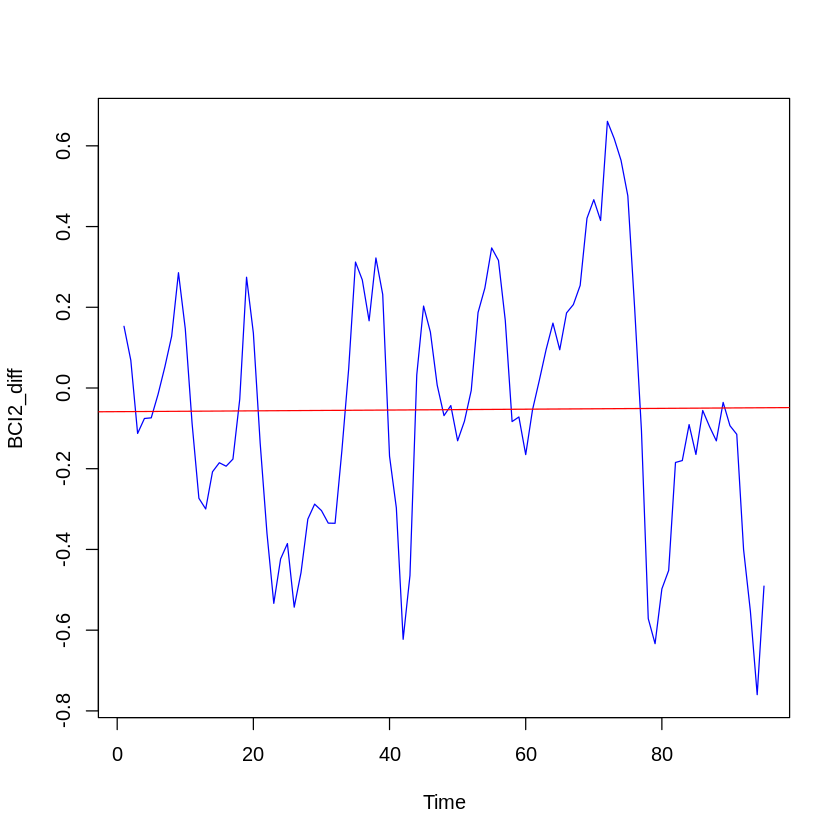

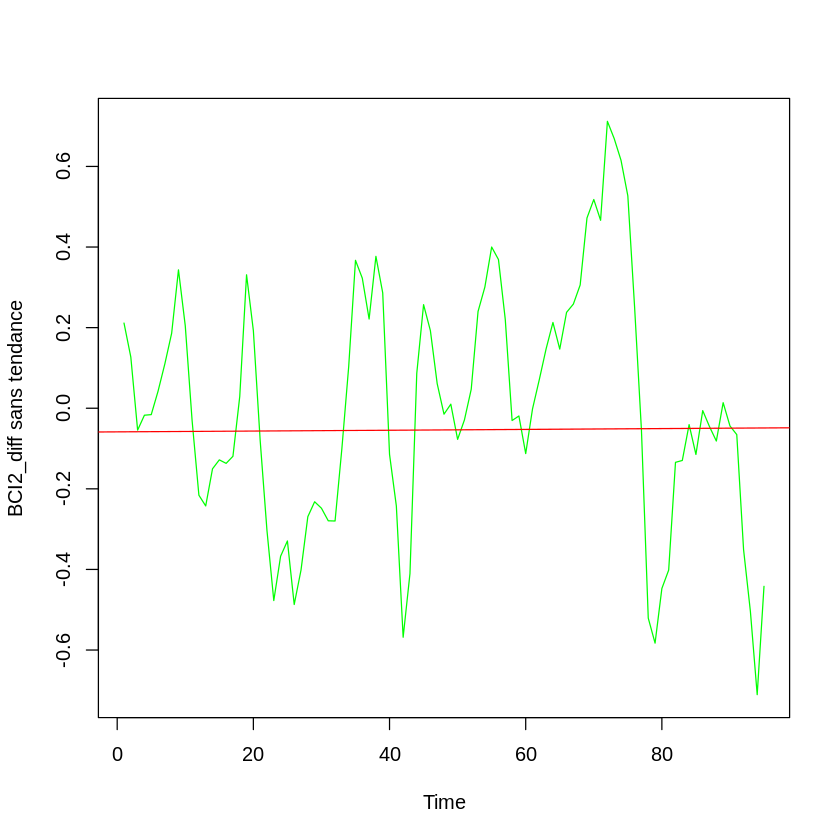

In [ ]:
time <- seq_along(BCI2_diff)
modele_regression <- lm(BCI2_diff ~ time)

# Résumé du modèle
summary(modele_regression)

# Test des coefficients
library(lmtest)
library(sandwich)
coeftest(modele_regression,vcov. = vcovHAC(modele_regression,type="HAC"))

# Créer une nouvelle série sans la tendance
BCI2_diff_st <- residuals(modele_regression)

# Créer un nouveau modèle sans la tendance
modele_sans_tendance <- lm(BCI2_diff_st ~ 1)

# Résumé du modèle sans tendance
summary(modele_sans_tendance)

# Graphique de la série originale avec la régression
plot(BCI2_diff, type = "l", col = "blue", ylab = "BCI2_diff", xlab = "Time")
abline(modele_regression, col = "red")

# Graphique de la série sans tendance
plot(BCI2_diff_st, type = "l", col = "green", ylab = "BCI2_diff sans tendance", xlab = "Time")
abline(modele_regression, col = "red")


La non-significativité du coefficient associé à seq_along(BCI2_diff) et la non-significativité de la statistique F suggèrent qu'il n'y a pas suffisamment de preuves pour affirmer la présence d'une tendance déterministe dans la série.
La chute des valeurs de BCI2_diff peut correspondre à la crise de stabilité politique du pays en 2018 et 2019 associée à les manifestations populaires de pays et l'"Estallido Social" qui ont sèverement touché la région.


On conclut que BCI2_diff est stationnaire.

# **4. Estimation et tests de validation d'un modèle ARMA pour la série Labor_diff**


On cherche désormais à identifier le modèle ARMA(p,q) suivi par Labor_diff = Xt :
Pour cela, on balaye les différents retards p et q possibles afin de choisir le processus ARMA (p,q) qui minimise les critères d’informations.

In [ ]:
library(forecast)

mat_aic <- matrix(0, 6, 6)
mat_bic <- matrix(0, 6, 6)
for (i in 0:5) {
  for (j in 0:5) {
    ARMA_ij <- ARIMA(Labor_diff, order = c(i, 0, j), method = "ML")
    mat_aic[i + 1, j + 1] <- AIC(ARMA_ij)
    mat_bic[i + 1, j + 1] <- BIC(ARMA_ij)
  }
}
rownames(mat_aic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4', 'p=5')
colnames(mat_aic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4', 'q=5')
rownames(mat_bic) <- c('p=0', 'p=1', 'p=2', 'p=3', 'p=4', 'p=5')
colnames(mat_bic) <- c('q=0', 'q=1', 'q=2', 'q=3', 'q=4', 'q=5')

print(mat_aic)
print(mat_bic)



Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”


          q=0       q=1       q=2       q=3       q=4       q=5
p=0 -87.56206 -85.81944 -86.87522 -93.48922 -91.72971 -94.28115
p=1 -85.91149 -87.98450 -92.04259 -92.19444 -90.47207 -95.76005
p=2 -87.44297 -89.59873 -91.25800 -97.10034 -95.11129 -94.48453
p=3 -92.96001 -90.99912 -95.49093 -95.11990 -97.68357 -92.48576
p=4 -90.99065 -89.00021 -93.83626 -98.24551 -94.68728 -91.85275
p=5 -89.19090 -94.50775 -92.63449 -92.90570 -91.41889 -89.93115
          q=0       q=1       q=2       q=3       q=4       q=5
p=0 -82.45431 -78.15781 -76.65971 -80.71984 -76.40644 -76.40401
p=1 -78.24986 -77.76899 -79.27321 -76.87118 -72.59493 -75.32903
p=2 -77.22746 -76.82935 -75.93473 -79.22321 -74.68028 -71.49964
p=3 -80.19063 -75.67586 -77.61380 -74.68888 -74.69868 -66.94699
p=4 -75.66738 -71.12308 -73.40525 -75.26062 -69.14851 -63.76010
p=5 -71.31376 -74.07673 -69.64960 -67.36693 -63.32624 -59.28463


On va tester la validité des coefficients pour une MA(3), AR (3), ARMA(4,3), ARMA(2,3), ARMA(1,2) et  ARMA (1,3)

## Analyse des coefficients pour différents modèles estimés

Labor_diff est une série I(0) sans tendance ni constante alors on choisi le paramètre include.mean = false

In [ ]:
library(lmtest)

ARIMA003 <- Arima(y = Labor_diff, order = c(0, 0, 3), include.mean = FALSE)
coeftest(ARIMA003)

ARIMA300 <- Arima(y = Labor_diff, order = c(3, 0, 0), include.mean = FALSE)
coeftest(ARIMA300)

ARIMA403<-Arima(y = Labor_diff, order=c(4,0,3),include.mean = FALSE)
coeftest(ARIMA403)

ARIMA203<-Arima(y = Labor_diff, order=c(2,0,3),include.mean = FALSE)
coeftest(ARIMA203)

ARIMA102<-Arima(y = Labor_diff, order=c(1,0,2), include.mean = FALSE)
coeftest(ARIMA102)

ARIMA103 <- Arima(y = Labor_diff, order = c(3, 0, 1), include.mean = FALSE)
coeftest(ARIMA103)


z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ma1  0.043386   0.102000  0.4254  0.67058   
ma2  0.112994   0.093139  1.2132  0.22506   
ma3 -0.323758   0.114610 -2.8249  0.00473 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ar1  0.011162   0.098089  0.1138 0.909400   
ar2  0.183203   0.096581  1.8969 0.057841 . 
ar3 -0.266166   0.098451 -2.7035 0.006861 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.75716    0.20515 -3.6908 0.0002236 ***
ar2  0.85042    0.31917  2.6645 0.0077108 ** 
ar3  0.35275    0.22547  1.5645 0.1176945    
ar4 -0.32561    0.10640 -3.0602 0.0022122 ** 
ma1  0.85340    0.21625  3.9464 7.934e-05 ***
ma2 -0.68956    0.31343 -2.2001 0.0278020 *  
ma3 -0.54297    0.20343 -2.6691 0.0076062 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1  0.07138    0.22626  0.3155 0.7524010    
ar2  0.44410    0.22214  1.9992 0.0455889 *  
ma1 -0.04970    0.21885 -0.2271 0.8203499    
ma2 -0.28110    0.21194 -1.3263 0.1847275    
ma3 -0.34810    0.10230 -3.4027 0.0006671 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.70410    0.14049 -5.0118 5.393e-07 ***
ma1  0.77167    0.15171  5.0865 3.647e-07 ***
ma2  0.30992    0.11170  2.7746  0.005526 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1 -0.098407   0.329917 -0.2983  0.76549  
ar2  0.179052   0.098477  1.8182  0.06903 .
ar3 -0.244287   0.122899 -1.9877  0.04684 *
ma1  0.118277   0.337453  0.3505  0.72596  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


On trouve que le modèle ARMA(1,2) est celui qui a le plus grand nombre de coefficients significatifs. On va expérimenter avec le nombre de retards pour voir si il ne faut pas rajouter des retards sur la partie AR.





In [ ]:
ARIMA102<-Arima(y = Labor_diff, order=c(1,0,2), include.mean = FALSE)
library(lmtest)
coeftest(ARIMA102)

ARIMA202<-Arima(y = Labor_diff, order=c(2,0,2), include.mean = FALSE)
library(lmtest)
coeftest(ARIMA202)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.70410    0.14049 -5.0118 5.393e-07 ***
ma1  0.77167    0.15171  5.0865 3.647e-07 ***
ma2  0.30992    0.11170  2.7746  0.005526 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.93365    0.27626 -3.3796 0.0007259 ***
ar2 -0.26514    0.22792 -1.1633 0.2447127    
ma1  0.97991    0.23548  4.1613 3.164e-05 ***
ma2  0.53191    0.18960  2.8055 0.0050243 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



# **Estimation d'un modèle ARMA(1,2) pour la série Labor_diff**

# Test sur les paramètres de l'ARMA(1,2)

In [ ]:
summary(ARIMA102)
ARIMA102<-Arima(y = Labor_diff, order=c(1,0,2), include.mean = FALSE)
coeftest(ARIMA102)

Series: Labor_diff 
ARIMA(1,0,2) with zero mean 

Coefficients:
          ar1     ma1     ma2
      -0.7041  0.7717  0.3099
s.e.   0.1405  0.1517  0.1117

sigma^2 = 0.02068:  log likelihood = 50.8
AIC=-93.6   AICc=-93.16   BIC=-83.39

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.00969005 0.1415083 0.1122466 58.13567 203.8109 0.6653124
                    ACF1
Training set -0.03312455


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.70410    0.14049 -5.0118 5.393e-07 ***
ma1  0.77167    0.15171  5.0865 3.647e-07 ***
ma2  0.30992    0.11170  2.7746  0.005526 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Xt​\=ϕ1​Xt−1​+θ1​εt−1​+θ2​εt−2​+εt​

Xt​\=−0.7041Xt−1​+0.7717εt−1​+0.3099εt−2​+εt​

**Test de significativité individuelle des coefficients**

Vérification de la significativité des coefficients estimés

      Hypothèses du test :
      * H0 : ϕi = 0
      * H1 : ϕi ̸= 0

t-stat= Coefficient estimé / Erreur standard du coefficient

tstat = ϕiˆ → St(T − k) où k est le nombre de coefficients estimés = 3

96-3 = 93 > 30


Rejet de H0 quand |tstatϕi| > u(1−α/2)


  * u(1−0.01/2) seuil = 2.57 pour un risque de première espèce égal à 1\%
  * u(1−0.05/2) seuil = 1.96 pour un risque de première espèce égal à 5\%

1. **Significativité des coefficients de l'AR(1):**

`Estimation du ar1`

    - |tΦ1| =|-5.0118| > 1.96
    - Pr(>|z|) : 5.393e-07 (p-value) < 0.05

Le z-value associé est -5.0118, ce qui est significativement différent de zéro. La valeur p (Pr(>|z|)) est très proche de zéro (5.393e-07), ce qui suggère que le coefficient `ar1` est statistiquement significatif à un niveau de confiance élevé (typiquement 95% ou plus).

2. **Significativité des coefficients MA(2) :**

`Estimation du ma1`

    - |tθ2|= |5.0865| > 1.96
    - Pr(>|z|) : 3.647e-07 (p-value)  <0.05

Cela suggère que le coefficient `ma1` est statistiquement significatif.

`Estimation du ma2`

    - |tθ1|= |2.7746| > 1.96
    - Pr(>|z|) : 0.005526 (p-value)

 Cela indique que le coefficient `ma2` est significatif à un niveau de confiance de 95% .

En résumé, les résultats suggèrent que tous les coefficients (`ar1`, `ma1`, et `ma2`) sont statistiquement significatifs, ce qui suggère qu'ils contribuent de manière significative à la prédiction du modèle ARMA(1,2).

On applique le modèle sur la série originale, transformé en ARIMA(1,1,2) pour explorer visuellement son ajustement à notre série.

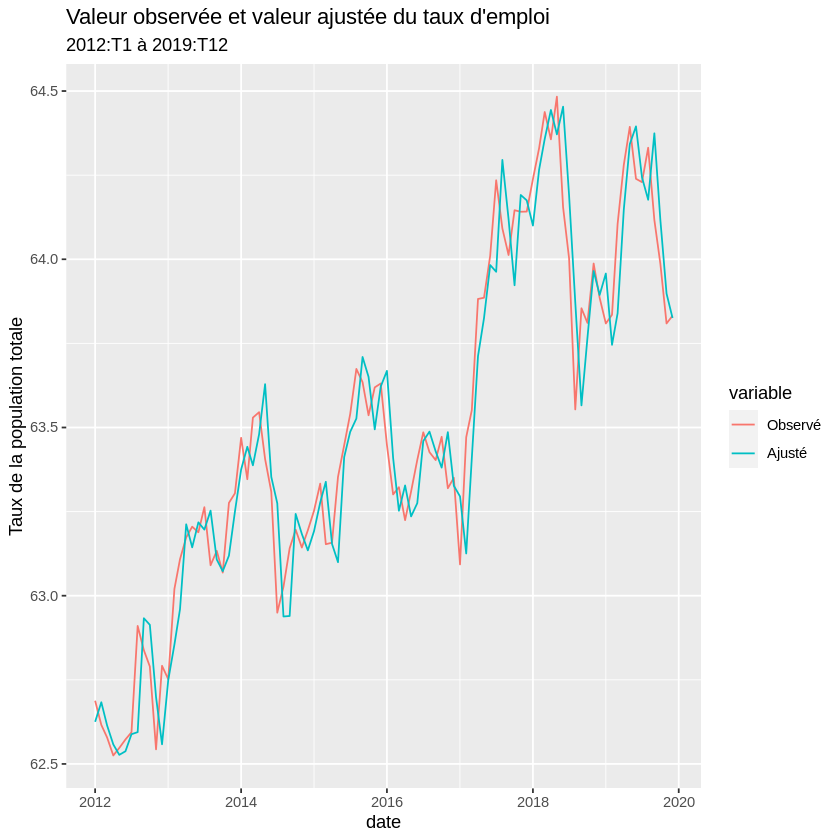

In [ ]:
#Modèle ajusté
ARIMA112<-Arima(y = Labor_CL2$Emploi, order=c(1,1,2), include.mean=FALSE)
library(ggplot2)
library(reshape2)

df_plot<-data.frame(Labor_CL2$Date,Labor_CL2$Emploi,F=as.matrix(ARIMA112$fitted))
colnames(df_plot)<-c("date","Observé","Ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_F_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_us+labs(y="Taux de la population totale",title = "Valeur observée et valeur ajustée du taux d'emploi",
            subtitle = "2012:T1 à 2019:T12")

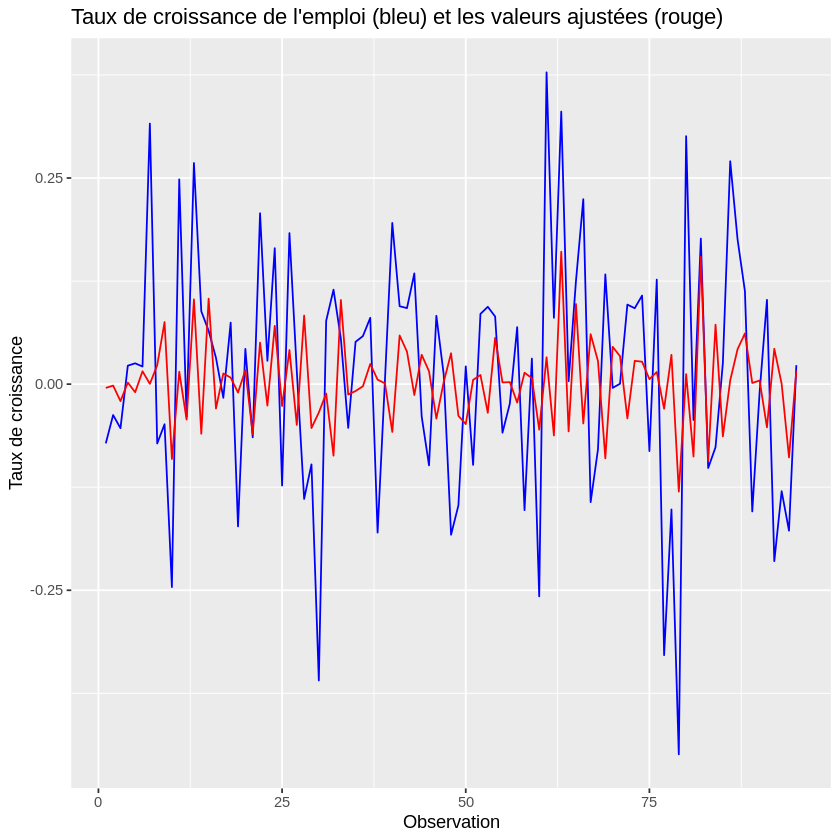

In [ ]:
ggplot(data = data.frame(Labor_diff,F=as.matrix(ARIMA102$fitted))) +
  geom_line(aes(x = seq_along(Labor_diff), y = Labor_diff), color = "blue") +  geom_line(aes(x = seq_along(ARIMA102$fitted), y = ARIMA102$fitted), color = "red") +
  labs(title = "Taux de croissance de l'emploi (bleu) et les valeurs ajustées (rouge)", x = "Observation", y = "Taux de croissance")

**Test sur les racines**

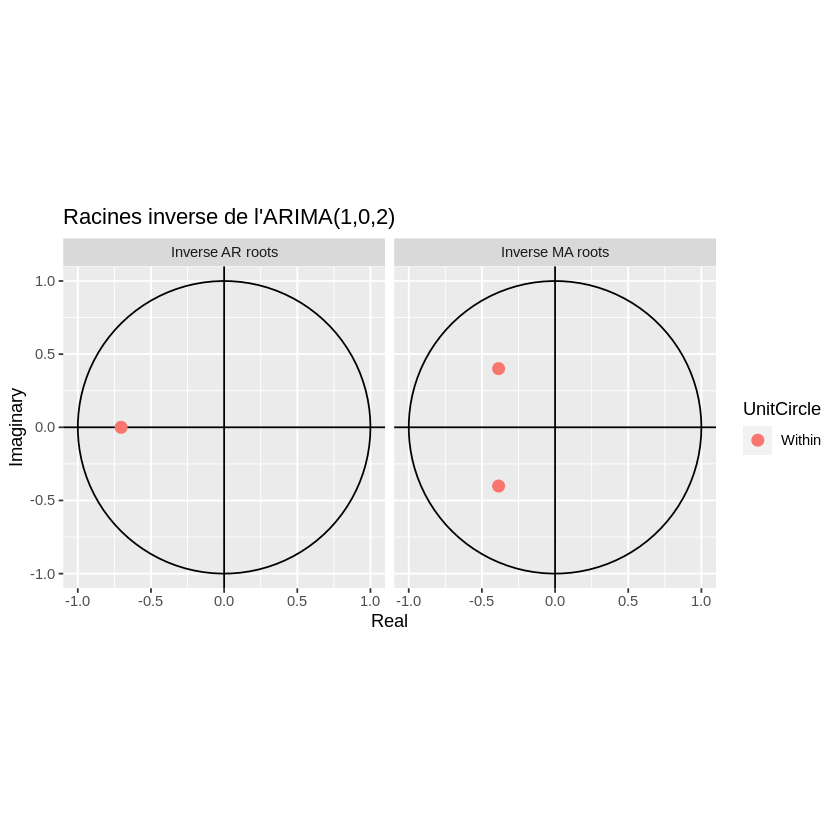

In [ ]:
autoplot(ARIMA102, main = "Racines inverse de l'ARIMA(1,0,2)")

On représente les inverses des racines dans le cercle unitaire. La condition de stationnarité impose que ces inverses doivent être de module strictement inférieur à 1, c'est-à-dire dans le cercle unitaire. La condition de stationnarité est donc satisfaite.

# Test sur les résidus

**1. Test d'absence d'autocorrélation de Ljung-Box**

Hypothèse Nulle (H0) : Les autocorrélations des résidus jusqu'au retard 12 sont nulles (absence d'autocorrélation).

Hypothèse Alternative (H1) : Au moins une des autocorrélations des résidus jusqu'au lag 12 est différente de zéro (présence d'autocorrélation).

Statistique de Test : La statistique de test est basée sur la somme des carrés des autocorrélations des résidus jusqu'au lag 12.


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with zero mean
Q* = 10.199, df = 9, p-value = 0.3346

Model df: 3.   Total lags used: 12



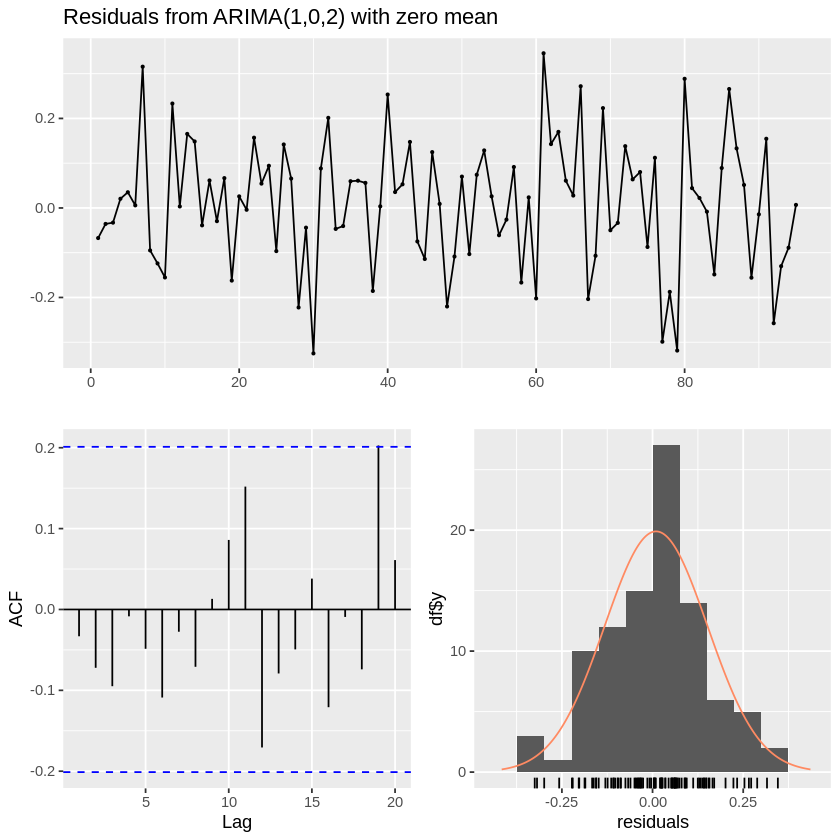

In [ ]:
#Test residus
test_resARIMA102<-checkresiduals(ARIMA102,lag = 12)

**Test d'absence d'autocorrélation des résidus**

On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 12. Les hypothèses du test sont:

        H0: ρ(1) = ρ(2) = ... =ρ(12) = 0
        H1: i𝞊 {1, ... ,12} tel que ρ(i) ̸= 0
L'autocorrélogramme montre que toutes les autocorrélations sont situées dans les bornes de l'intervalle de confiance à 95% : aucune des autocorrélations n'est significativement différente de 0.

        La statistique de Ljung Box est Q*(12) = 10.199
        La p-value = 0.3346 > 0.05

Sous H0, LB_ stat suit une loi de 𝒳^2 (12-p-q) =X^2(10-3)=X^2(9)

Les seuils critiques tirés de la loi 𝒳^2(9)

    *   Q*(9)0.90= 14,684 pour un risque de première espèce de 10%
     *  Q*(9)0.95= 16,919 pour un risque de première espèce de 5%
     *  Q*(9)0.99 = 21,666 pour un risque de première espèce de 1%
La statistique du test est inférieur à ces seuils critiques. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus pour un risque de première espèce de 1%, 5% et 10%.

La probabilité critique est supérieur aux risques de première espèce. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus.

Le test de Ljung-Box suggère que les résidus sont un Bruit Blanc.

**Test de normité de résidus**

On va enlever les valeurs extrêmes des observations pour étudier la normité des résidus.

In [ ]:
which(ARIMA102$residuals==max(ARIMA102$residuals))
which(ARIMA102$residuals==min(ARIMA102$residuals))

[1] 61

[1] 30

[1] "Skewness des residus : -0.091478"

[1] "Kurtosis des residus : 2.760271"

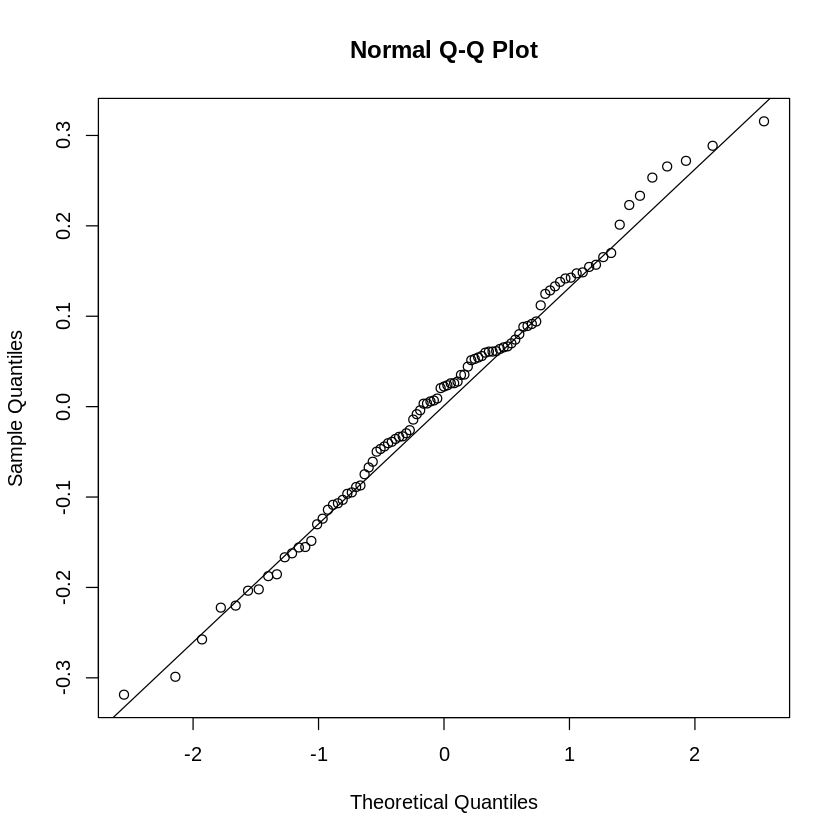

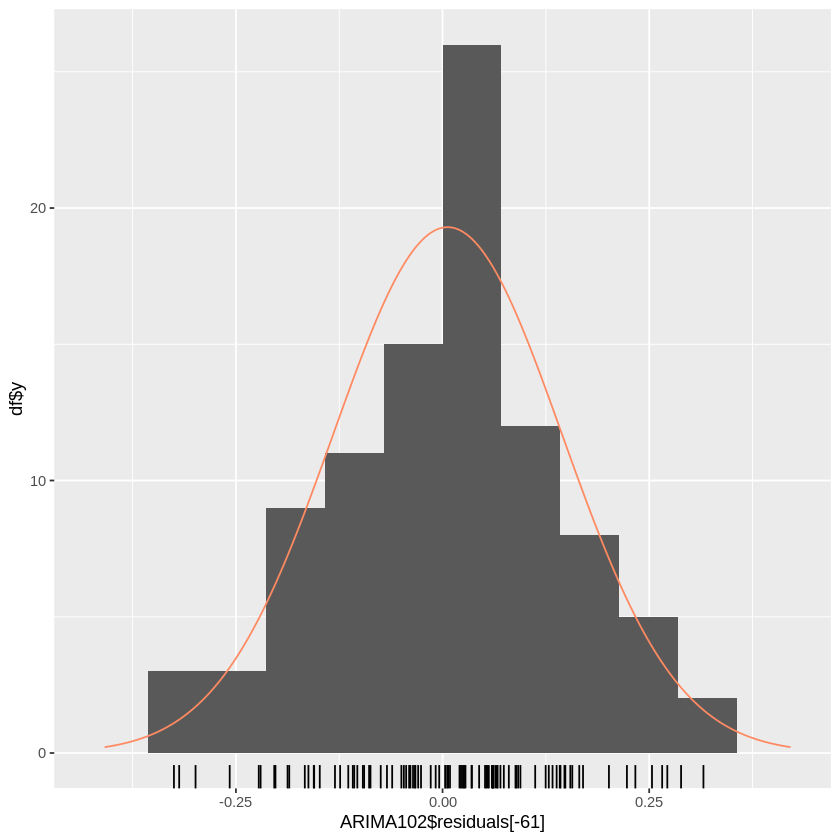

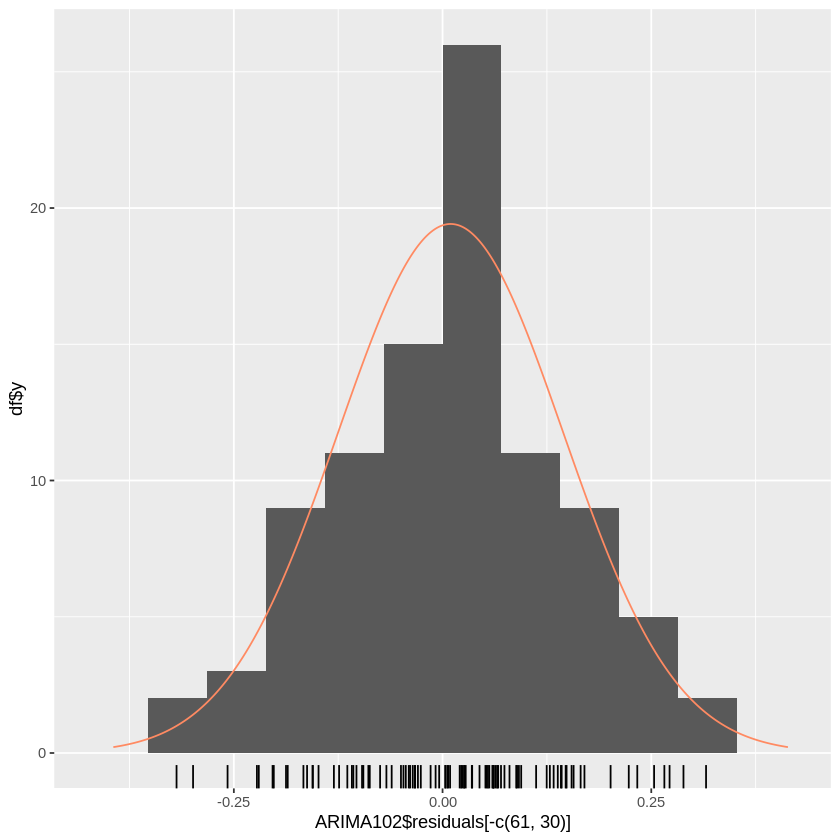

In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(ARIMA102$residuals[-61][-30]))
sprintf("Kurtosis des residus : %f",kurtosis(ARIMA102$residuals[-61][-30]))
qqnorm(ARIMA102$residuals[-61][-30])
qqline(ARIMA102$residuals[-61][-30])
gghistogram(ARIMA102$residuals[-61], add.normal = TRUE)
gghistogram(ARIMA102$residuals[-c(61,30)], add.normal = TRUE)


**Test de l'hypothèse en normalité de Jarque and Bera**

Hypothèses du test :
* H0 : S(X) = 0 et K(X) = 3
* H1 : S(X) ̸= 0 ou K(X) ̸= 3
La statistique du test notée LJB est une moyenne pondérée de (S(X)− 0)^2 et (K(X) − 3)^2
Sous H0, la statistique de test suit la loi LJB → χ2(2).
On rejettera H0 si la statistique de test est supérieure au seuil critique ou si la probabilité critique est inférieure au risque de première espèce 5%

In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(ARIMA102$residuals[-c(61,30)]))
sprintf("kurtosis des residus : %f",kurtosis(ARIMA102$residuals[-c(61,30)]))

[1] "Skewness des residus : -0.091478"

[1] "kurtosis des residus : 2.760271"

* Le skewness estimé est négatif, mais très proche de 0 : on a une très legère asymétrie du côté des valeurs négatives de sa moyenne
* Le kurtosis estimé est inférieur à 3

In [ ]:
library(tseries)
jarque.bera.test(ARIMA102$residuals)
jarque.bera.test(ARIMA102$residuals[-c(61,30)])


	Jarque Bera Test

data:  ARIMA102$residuals
X-squared = 0.16766, df = 2, p-value = 0.9196



	Jarque Bera Test

data:  ARIMA102$residuals[-c(61, 30)]
X-squared = 0.3524, df = 2, p-value = 0.8384


Les seuils critiques sont χ2(2):
1. χ2(2)0.90 = 4.61
2. χ2(2)0.95 = 5.99
3. χ2(2)0.99 = 9.21

La statistique du test de Jarque et Bera est égale à est JB_stat = 0.16766

JB_stat est inférieure aux seuils critiques pour des risques de première espèce de 1%, 5% et 10% : on ne peut pas rejetter l'hypothèse d'une loi normale pour les résidus.

La probabilité critique est de  0.9196, supérieure au risque de première espèce de 1%, 5% et 10%.  On ne rejette pas l'hypothèse nulle de normalité des résidus.

On conclut que les résidus suivent une loi normale.

**Test de Engle Granger d'absence d'effet ARCH**


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ARIMA102$residuals
Chi-squared = 4.2502, df = 4, p-value = 0.3732


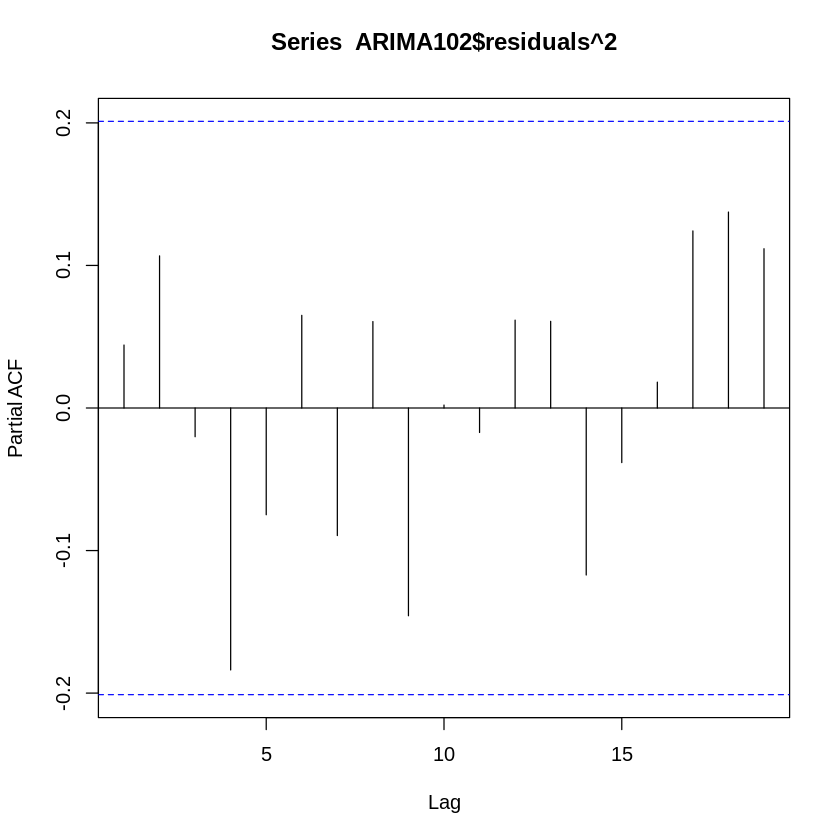

In [ ]:
pacf(ARIMA102$residuals^2)
library(FinTS)
ArchTest(ARIMA102$residuals,lags=4,demean = FALSE)

La statistique de test est ARCH_LM = 4.2502

Les seuils critiques sont :

        4.61 pour un risque de première espèce de 10%
        5.99 pour un risque de première espèce de 5%
        9.21 pour un risque de première espèce de 1%

 ARCH_LM est inférieur aux seuils critiques, on rejette l'hypothèse nulle d'absence d'effet ARCH pour les résidus pour les risques de première espèce habituel (1%, 5% et 10%)

 La probabilité critique est de 0.3732 > probabilité critique
 On ne rejette pas l'hypothèse nulle d'absence d'effet ARCH

 La hausse exceptionnelle du taux d'emploi en 2018 explique ce rejet de l'hypothèse d'homoscédasticité.

# 5. Calcul de prévisions à l'horizon 3


**Prévision pour les 3 derniers mois de l'année 2019 (octobre, novembre, décembre).**

On va écarter les 3 dernieres observations de notre série Labor_diff pour voir ce que le modèle projette comme taux de croissance pour l'emploi lors de ces 3 derniers mois.

   Point Forecast    Lo 95    Hi 95
97       63.79371 63.51158 64.07583
98       63.82292 63.41023 64.23561
99       63.80235 63.24459 64.36010

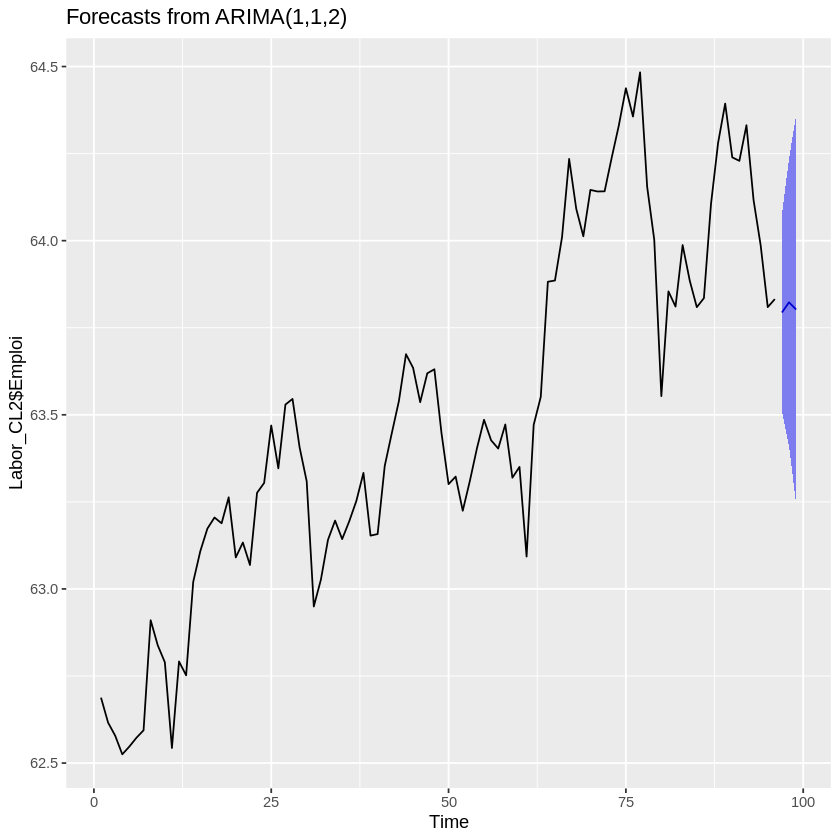

In [ ]:
# Forecast sur les valeurs en niveau avec l'ARIMA(1,1,2)
library(forecast)
forecast_ARIMA112<-forecast(ARIMA112,h=3,level=95)
forecast_ARIMA112
autoplot(forecast_ARIMA112)

**Calcul de la prévision sur la série stationnarisée pour l'horizon 3**

   Point Forecast      Lo 95     Hi 95
96    -0.03849260 -0.3203295 0.2433443
97     0.02921056 -0.2532690 0.3116901
98    -0.02056729 -0.3125628 0.2714283

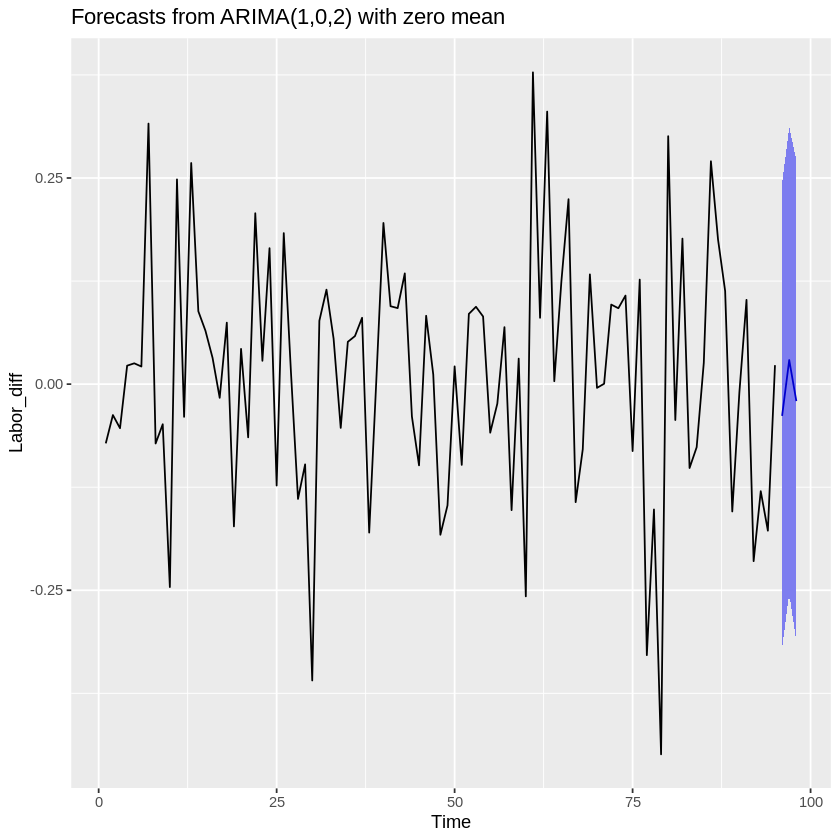

In [ ]:
library(forecast)
forecast_ARIMA102<-forecast(ARIMA102,h=3,level=95)
forecast_ARIMA102
autoplot(forecast_ARIMA102)

In [ ]:
#Projection à l'horizon 3
tail(forecast_ARIMA102$mean,n=3)
#Observations 93, 94 et 95 de Labor_diff
print(Labor_diff[93:95])
# Sélection de les 3 dernières erreurs
residus2 <- residuals(ARIMA102)
print(residus2[c(94, 95)])

A Time Series:
[1] -0.03849260  0.02921056 -0.02056729

[1] -0.12984756 -0.17770948  0.02300222
[1] -0.08887823  0.00680105


On a notre modèle ARMA(1,2) tel que:


Xt​\=  −0.7041Xt−1 ​ +0.7717εt−1​ + 0.3099εt−2​ + εt​

**Pour l'horizon h=1** = observation 96

On calcule avec les erreurs pour les 3 dernières observations:

Xt+1​\=  −0.7041Xt ​ +0.7717εt​ + 0.3099εt−1​ + εt​

Xt+1​\= −0.7041*0.02300222 ​ +0.7717 * 0.00680105​ + 0.3099 * -0.08887823 + 0​

Y^t+1= −0.0382

*On va travailler avec Yt+1=-0.0384926001341659 , les valeurs de Labor_diff et résidus sont trop arrondis*

Erreur et+1 = Yt+1-Y^t+1

**Pour l'horizon h=2**

ϵ^(t+1) = Xt+1-X^t+1 = 0 dans la meilleur prédiction

Xt+2​\=  −0.7041Xt+1 ​ +0.7717εt​+1 + 0.3099εt​ + εt​+2

Yt+2 = −0.7041 * -0.0384926001341659 ​ +0.7717 * 0 + 0.3099​ * 0.00680105 + 0

Yt+2= 0.027334871

*On va travailler avec Yt+2=-0.0292105647155874 , les valeurs de Labor_diff et résidus sont trop arrondies*

**Pour l'horizon h=3**

Xt+3​\=  −0.7041Xt+2 ​ +0.7717εt​+2 + 0.3099εt​+1 + εt​+3

Xt+3 = −0.7041* 0.0292105647155874 =−0.02057

On voit que nos résultats sont cohérents avec les valeurs prédites par R.


In [ ]:
library(dplyr)
  Labor_CL3 <- Labor_CL %>%
  filter(Date >= as.Date("2012-01-01") )
Labor_diff3 <- diff(Labor_CL3$Emploi)

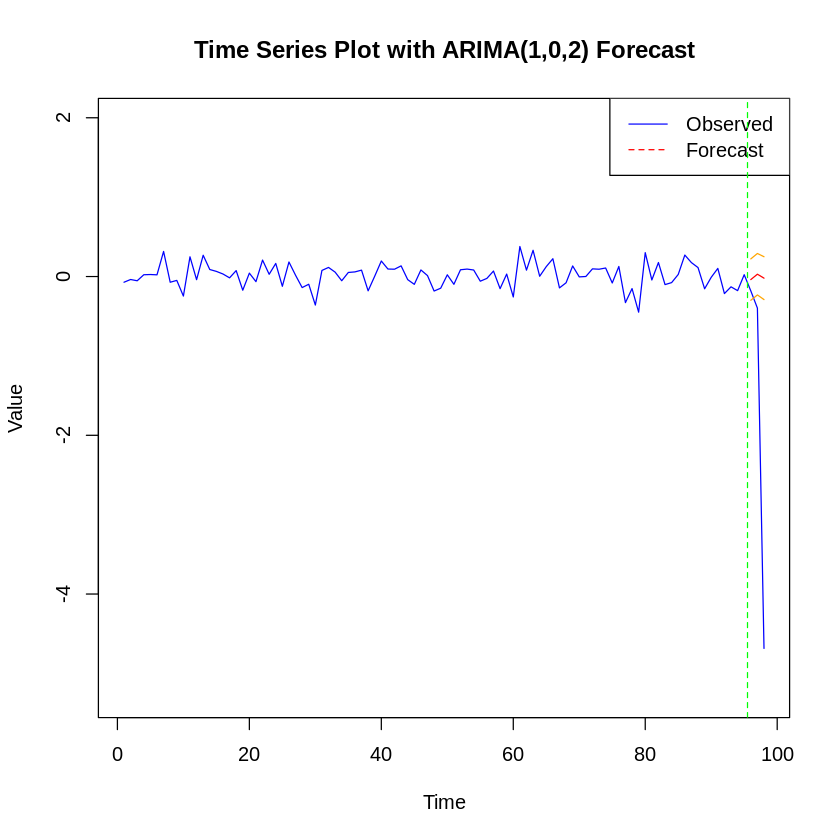

In [ ]:
library(forecast)

# Plot the series and forecast
plot.ts(Labor_diff3[1:98], col = "blue", ylim = c(min(Labor_diff3), max(Labor_diff3, forecast_ARIMA102$upper)),
        main = "Time Series Plot with ARIMA(1,0,2) Forecast",
        xlab = "Time", ylab = "Value")
lines(forecast_ARIMA102$mean, col = "red")  # Forecasted values
lines(forecast_ARIMA102$upper, col = "orange")  # Upper bound of forecast
lines(forecast_ARIMA102$lower, col = "orange")  # Lower bound of forecast
legend("topright", legend = c("Observed", "Forecast"), col = c("blue", "red"), lty = c(1, 2))

# Add vertical line to mark the transition from observed to forecasted values
abline(v = 95.5, col = "green", lty = 2)


Ces valeurs nous permettent de prédire comment aurait continué à évoluer le taux d'emploi sans la venue du Covid 19.

On va faire les mêmes prédictions sur le niveau de l'emploi pour mieux illustrer le phénomène.

In [ ]:
#prévision du taux de croissance de l'emploi
tail(forecast_ARIMA112$mean,n=3)
#3 dernières observations du passé
tail(Labor_CL2[94:96,])

A Time Series:
[1] 63.79371 63.82292 63.80235

Date,Emploi
<dttm>,<dbl>
2019-10-01,63.98691
2019-11-01,63.80920
2019-12-01,63.83220


# **Modélisation multivariée**


## 6. Estimation du Modèle VAR

In [ ]:
install.packages("vars")
install.packages("lpirfs")
install.packages("tsDyn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘strucchange’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deSolve’, ‘mnormt’, ‘tseriesChaos’




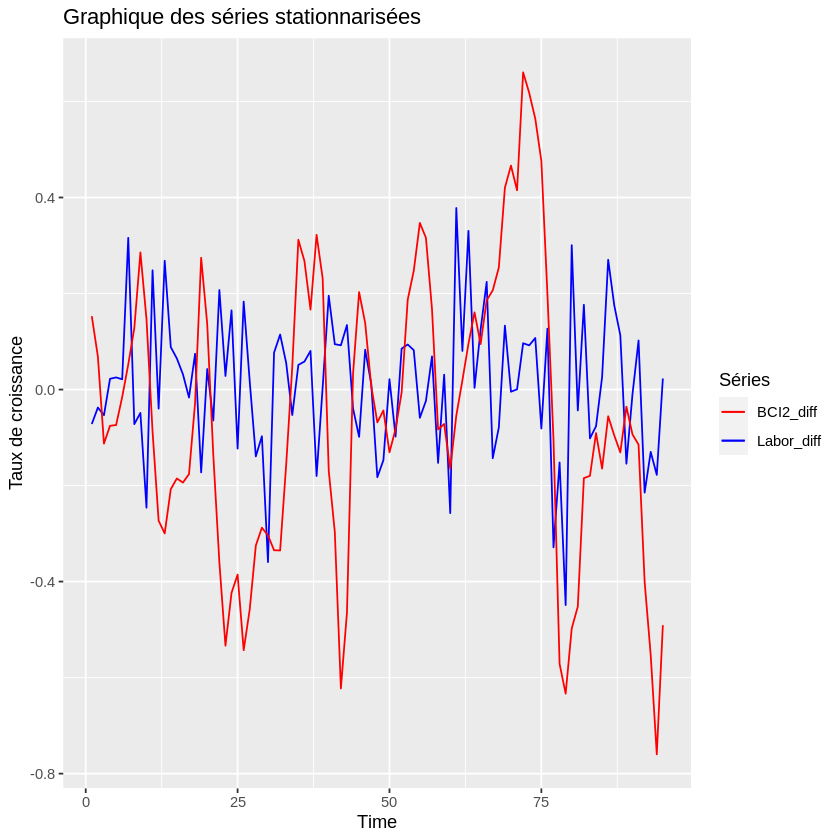

In [ ]:
# Création du dataframe avec les séries stationnarisées
stationary_data <- data.frame(Labor_diff = Labor_diff, BCI2_diff = BCI2_diff)

# Plot des deux séries stationnarisées dans un même graphique

ggplot(stationary_data, aes(x = seq_along(Labor_diff))) +
  geom_line(aes(y = Labor_diff, color = "Labor_diff")) +
  geom_line(aes(y = BCI2_diff, color = "BCI2_diff")) +
  labs(title = "Graphique des séries stationnarisées",
       x = "Time", y = "Taux de croissance") +
  scale_color_manual(name = "Séries",
                     values = c("Labor_diff" = "blue", "BCI2_diff" = "red"))


In [ ]:
#Statistiques descriptives

summary(stationary_data[c("Labor_diff","BCI2_diff")])
sapply(stationary_data[c("Labor_diff","BCI2_diff")],sd)
correlation <- cor(stationary_data$Labor_diff, stationary_data$BCI2_diff)
print(correlation)


   Labor_diff         BCI2_diff       
 Min.   :-0.44895   Min.   :-0.75982  
 1st Qu.:-0.07773   1st Qu.:-0.24040  
 Median : 0.02239   Median :-0.07397  
 Mean   : 0.01205   Mean   :-0.05373  
 3rd Qu.: 0.09413   3rd Qu.: 0.16363  
 Max.   : 0.37811   Max.   : 0.66068  

Labor_diff  BCI2_diff 
 0.1502352  0.2997816

[1] 0.08596338


Les statistiques descriptives montrent que les moyennes des deux taux de croissance ne sont pas similaires.
Le taux de croissance du Business Confidence Index est plus variable que celui de la consommation, comme le montrent les écarts types, les maxima et minima.

In [ ]:
cor.test(stationary_data$BCI2_diff, stationary_data$Labor_diff)


	Pearson's product-moment correlation

data:  stationary_data$BCI2_diff and stationary_data$Labor_diff
t = 0.83208, df = 93, p-value = 0.4075
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1176174  0.2826101
sample estimates:
       cor 
0.08596338 


La corrélation entre les deux est 0.08596338, très proche de 0.
En regardant le résultat du test, avec un p-value de 0.4075, on ne peut pas considérer la corrélation comme significative au niveau de confiance de 0.05

En résumé, selon ce test, il n'y a pas suffisamment de preuves pour conclure qu'il existe une corrélation significative entre les deux variables.

Le relation de ces deux indicateurs peut être bidirectionnelle, mais l'existence du temps d'ajustement peut montrer que ce n'est pas corrélé à l'instant t.
Ceci on pourrait l'expliquer l'interpéter parceque les variations du taux d'emploi (et donc du chômage) n'ont pas une conséquence immédiate de la perception des acteurs de l'industrie. Néanmoins, on ne peut rien dire encore sur la validité de cette hypothèse.  On va faire une étude d'un modèle VAR pour voir si il existent des corrélations intertemporelles.

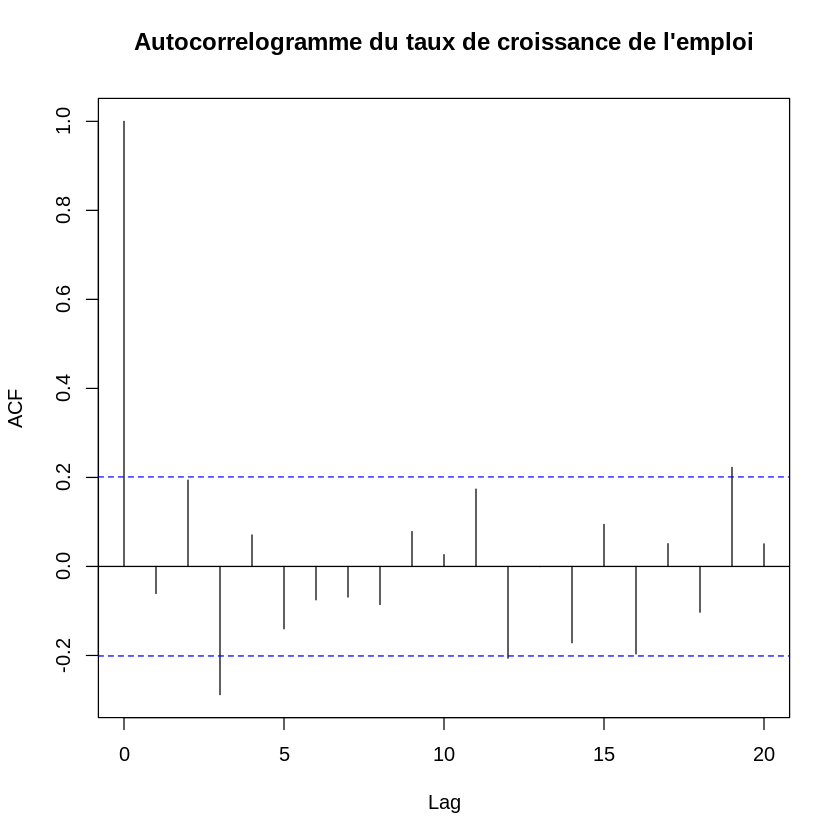

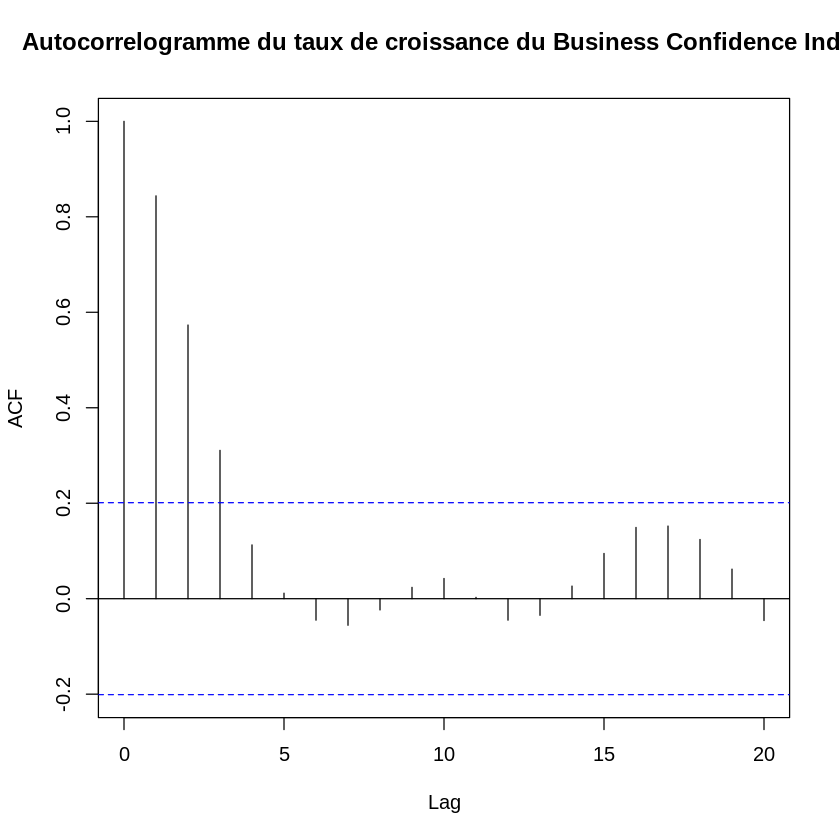

In [ ]:
acf(stationary_data$Labor_diff,lag.max = 20, main="Autocorrelogramme du taux de croissance de l'emploi")
acf(stationary_data$BCI2_diff,lag.max = 20, main="Autocorrelogramme du taux de croissance du Business Confidence Index")

# Modélisation VAR

**Sélection du nombre de retards optimal**

On commence par déterminer le nombre de retards par l'application de critères d'information multivariés. On doit spécifier :

On choisit un nombre de retards maximum égal à 24 (correspond à deux années de recul pour des données mensuelles) et l'on estime un modèle VAR avec une constante (la moyenne des taux de croissance n'est pas nulle.)

In [ ]:
library(vars)
pselect<-VARselect(y=stationary_data[,c(1,2)],lag.max=24,type=c("const"))
pselect$criteria # Affichage des valeurs des critère de sélection
pselect$selection # nombre de retards optimal selon les critères de sélection

,1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
AIC(n),-7.3436046315,-7.4733768065,-7.4743964569,-7.3882331041,-7.324361013,-7.2568050535,-7.1501128641,-7.0768284572,-7.1057653223,-7.0205410113,⋯,-6.781538618,-6.757130127,-6.689350844,-6.660746099,-6.67269576,-6.591716761,-6.668392817,-6.631918148,-6.572904785,-6.530904039
HQ(n),-7.2675655259,-7.3466449638,-7.2969718771,-7.1601157873,-7.045550959,-6.9273022624,-6.7699173359,-6.6459401920,-6.6241843200,-6.4882672719,⋯,-5.995801193,-5.920699965,-5.802227945,-5.722930463,-5.68418739,-5.552515651,-5.578498970,-5.491331564,-5.381625463,-5.288931980
SC(n),-7.1523922475,-7.1546894998,-7.0282342277,-6.8145959522,-6.623248939,-6.4282180562,-6.1940509442,-5.9932916146,-5.8947535571,-5.6820543234,⋯,-4.805677317,-4.653793903,-4.458539698,-4.302460030,-4.18693477,-3.978480847,-3.927681980,-3.763732388,-3.577244103,-3.407768434
FPE(n),0.0006467803,0.0005682724,0.0005681579,0.0006201862,0.000662606,0.0007112747,0.0007949812,0.0008606098,0.0008425682,0.0009264889,⋯,0.001286499,0.001356733,0.001501424,0.001606477,0.00166091,0.001897965,0.001867901,0.002078431,0.002392227,0.002743368


AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      2      3

Le nombre de retards varie entre 2 et 3 selon les critères. On va estimer avec 2 retards parceque AIC tend a surestimer le nombre de retards.


On a modélisé la série Labor_diff avec un modèle ARMA(1,2) et elle est stationnaire sans tendance ni constante, alors on voudrait spécifier "none" comme type pour la composante déterministe.

Mais la moyenne des taux de croissance n'est pas nulle, alors on choisi de mettre une composante déterministe "const".


In [ ]:
var.2lag <-VAR(y = stationary_data[,c("Labor_diff","BCI2_diff")],type=c("const"),lag.max = 2)
summary(var.2lag) #Affichage des résultats avec summary


VAR Estimation Results:
Endogenous variables: Labor_diff, BCI2_diff 
Deterministic variables: const 
Sample size: 93 
Log Likelihood: 102.577 
Roots of the characteristic polynomial:
0.6915 0.6915 0.4648 0.4003
Call:
VAR(y = stationary_data[, c("Labor_diff", "BCI2_diff")], type = c("const"), 
    lag.max = 2)


Estimation results for equation Labor_diff: 
Labor_diff = Labor_diff.l1 + BCI2_diff.l1 + Labor_diff.l2 + BCI2_diff.l2 + const 

              Estimate Std. Error t value Pr(>|t|)  
Labor_diff.l1 -0.05258    0.10586  -0.497   0.6206  
BCI2_diff.l1   0.00868    0.10490   0.083   0.9342  
Labor_diff.l2  0.19281    0.10731   1.797   0.0758 .
BCI2_diff.l2  -0.01090    0.10662  -0.102   0.9188  
const          0.01145    0.01617   0.708   0.4807  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.1517 on 88 degrees of freedom
Multiple R-Squared: 0.04115,	Adjusted R-squared: -0.002437 
F-statistic: 0.9441 on 4 and 88 DF,  p-value: 0.4425 


**Commentaires**

  Les racines du polynôme sont toutes en module strictément inférieures à 1, les conditions de stationnarité sont donc satisfaites.

            Roots of the characteristic polynomial:
            0.6915 0.6915 0.4648 0.4003

Labor_diff.li et BCI2_diff.li représentent respectivement le taux de croissance de l'emploi et le taux de croissance de l'Index BCI un retard de i périodes.

*Equation du taux de croissance Labor_diff*

      * Aucun des coefficients est significatif
      * R^2 est égal à 0.04115 , la regression n'explique que 4% des variations de Labor_diff

*Equation du taux de croissance BCI2_diff*

      * Les coefficients de Labor_diff ne sont pas significatifs pour le premier retard.
      * On a un coefficient un peu significatif (10%) et positif pour Labor_diff.l2 . Une augmentation de l'emploi influence positivement le BCI.
      * Les coefficients de BCI2_diff sont significatifs: la valeur de BCI2_diff est corrélée à ses valeurs du passée. Corrélée positivement pour le premier retard et négativement pour le deuxième.
      * La p-value du modèle est < 2.2e-16, soit inférieur au seuil critique de 5% , ce qui nous suggère que la regression a une certaine significativité
      * Le R^2 est de 0.8045 soit 80,45% le pouvoir explicatif de la régression est plus importante que pour Labor_diff

On a donc deux séries qui ne sont pas corrélées dont leur modélisation VAR est donc pas significative. On remarque quand même la corrélation de la série BCI2_diff de ses valeurs passées. Le coefficient négatif au lag 2 peut s'expliquer par un effet retroactif de l'augmentation du Business Confidence Index.

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


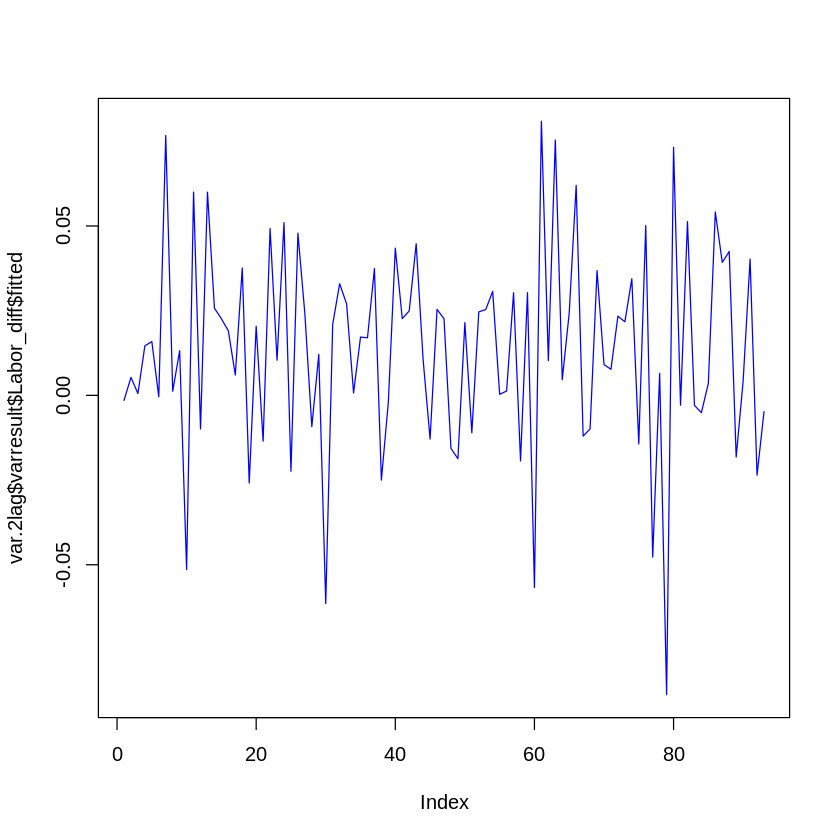

In [ ]:
plot(var.2lag$varresult$Labor_diff$fitted, type = "line", col = "blue")

#7. Déterminez les relations de causalité entre les variables et commentez les résultats obtenus.
**Test de causalité au sens de Granger du Business Confidence Index sur l'emploi**

On vérifie la significativité du coefficient de BCI2_diff(t-1) dans l'équation Labor_diff(t) . Les hypothèses du test:

* H0: a\_{12}^{1} = 0 --> BCI2_diff ne cause pas Labor_diff
* Ha: : a_{12}^{1} ̸= 0 ⇒ BCI2_diff cause Labor_diff

Ou a_{12}^{1} est le coefficient de la ligne 1 et colonne 2 de A


In [ ]:
causality(var.2lag,cause=c('BCI2_diff'))

$Granger

	Granger causality H0: BCI2_diff do not Granger-cause Labor_diff

data:  VAR object var.2lag
F-Test = 0.0052688, df1 = 2, df2 = 176, p-value = 0.9947


$Instant

	H0: No instantaneous causality between: BCI2_diff and Labor_diff

data:  VAR object var.2lag
Chi-squared = 1.5236, df = 1, p-value = 0.2171




La probabilité critique est de 0.2171, supérieur au seuil critique de 5%.

Sous H0,

F_stat → F(p, T−2p) --> F(2,95-2*2)
= F(2,91) =3,07

La statistique du test:  0.0052688

Rejet de l’hypothèse nulle d’absence de causalité au sens de Granger si la statistique de test est supérieure au seuil critique.
Helas F-Test< F_stat, on ne rejette pas l'hypothèse nulle d'absence de causalité.

Pour le deuxième lag, la probabilité critique est supérieure au risque de première espèce de 5%, on ne rejette non plus l'hypothèse nulle d'absence de causalité au sens de Granger.

**Conclusion**
On conclut que le BCI2_diff n'a pas d'effet sur Labor_diff.

**Test de causalité de l'emploi sur le Business Confidence Index**

On test le significativité du coefficient labor_diff.l1 dans l'équation BCI2_difft. Les hypothèses du test sont:

* H0: a_21^1 = 0 --> Labor_diff ne cause pas BCI2_diff
* H0: a_21^1 /= 0  --> Labor_diff cause BCI2_diff

ou `a_21^1` est le coefficient de la ligne 2 et colonne 1 de A1


In [ ]:
causality(var.2lag,cause=c('Labor_diff'))

$Granger

	Granger causality H0: Labor_diff do not Granger-cause BCI2_diff

data:  VAR object var.2lag
F-Test = 2.0289, df1 = 2, df2 = 176, p-value = 0.1345


$Instant

	H0: No instantaneous causality between: Labor_diff and BCI2_diff

data:  VAR object var.2lag
Chi-squared = 1.5236, df = 1, p-value = 0.2171



On a pas de causalité entre les deux variables non plus, Labor_diff ne cause pas BCI2_diff au sens de Granger.

In [ ]:
A<-Acoef(var.2lag)
A

,Labor_diff.l1,BCI2_diff.l1
Labor_diff,-0.05258536,0.008680426
BCI2_diff,0.12174576,1.238342996
,Labor_diff.l2,BCI2_diff.l2
Labor_diff,0.1928084,-0.01089477
BCI2_diff,0.1608020,-0.47044405


# 8. Analyse des fonction d'impulsion-réponse
# **Méthode des VAR**

Les chocs structurels sont déterminés par la méthode de Cholesky avec l'ordre (Labor_diff , BCI2_diff). Ceci parceque on suppose que la perception des acteurs de l'industrie percoivent une hausse ou baisse de l'emploi comme un indicateur de santé économique, et leur donne plus de confiance. L'ordre des variables dans le dataframe correspond bien à celui choisi pour la décomposition de Cholesky.

On calcule les fonctions impulsion réponse :

In [ ]:
install.packages("lpirfs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘iterators’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’, ‘Rdpack’, ‘Formula’, ‘doParallel’, ‘foreach’, ‘gridExtra’, ‘plm’




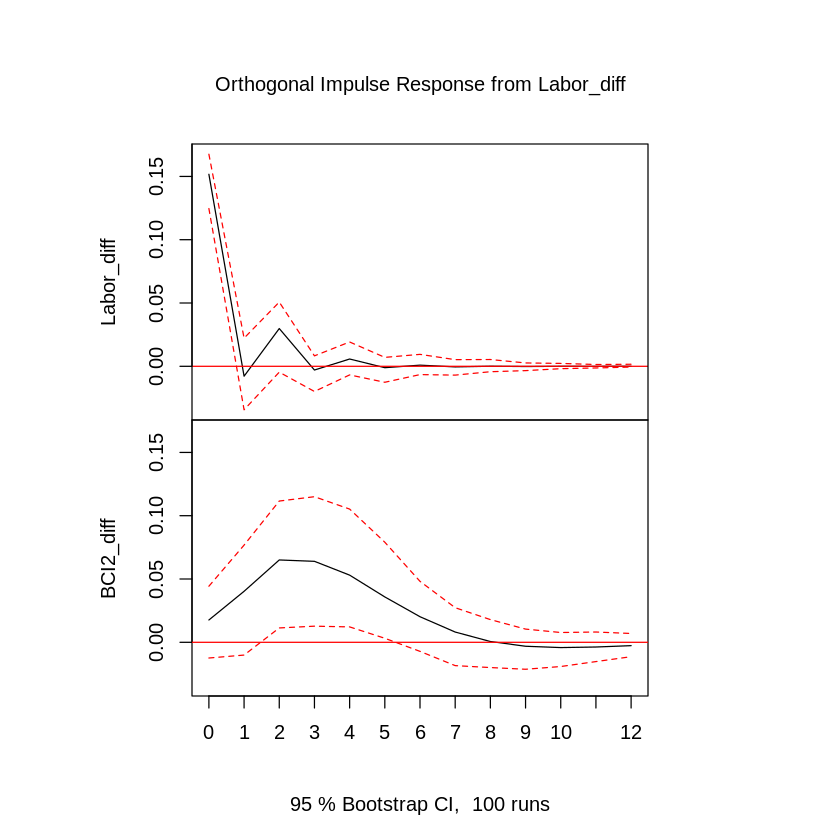

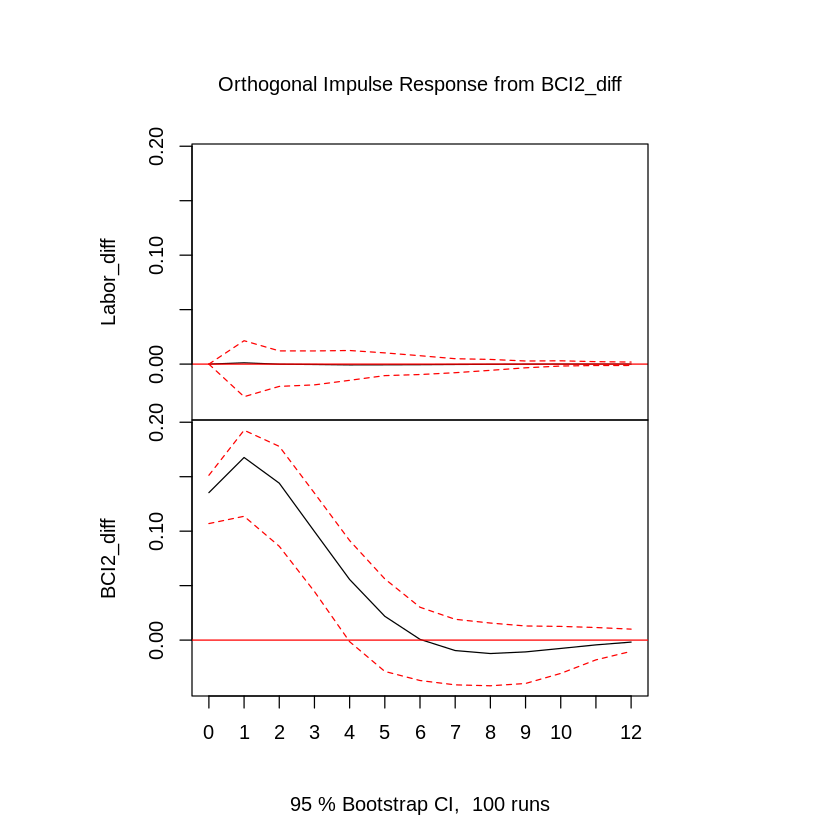

In [ ]:
irf<-irf(var.2lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)


Effet d'un choc sur Labor_diff :
*  On a un effet immédiat, positif et significatif sur le taux de croissance du BCI jusqu'au 8eme mois.

Effet d'un choc sur BCI2_diff :
* pas d'impact sur le taux de croissance de l'emploi

#**Estimation des IRF par les projections locales**

D'après nos résultats précédants, le modèle VAR n'est pas le bon modèle pour estimer ces deux séries.
On estime les IRF par la méthode des projections locales. On spécifie les paramètres suivants :

* le nombre d'horizon est égal à 24 (deux ans)
* Pour chaque horizon h, le nombre de retards dans la régression de la projection locale sera au plus égal à 12 (max_lags = 12) et choisi par la minimisation du critère BIC
* on applique des chocs égaux à 1 écart type du choc structurel : shock_type = 0. (shock_type =1 pour des chocs )
* Intervalle de confiance à 95% (confit=1.96) (confit = 1.65 pour un intervalle de confiance à 90% et confit=1 pour un intervalle de confiance à 68%)

**Spécification 1 : nombre de retards fixe**

On va fixer le nombre de retards à 12 pour tous les horizons et les deux variables. Chaque choc est l'égal à l'écart type du choc structurel correspondant.

[[1]]
NULL


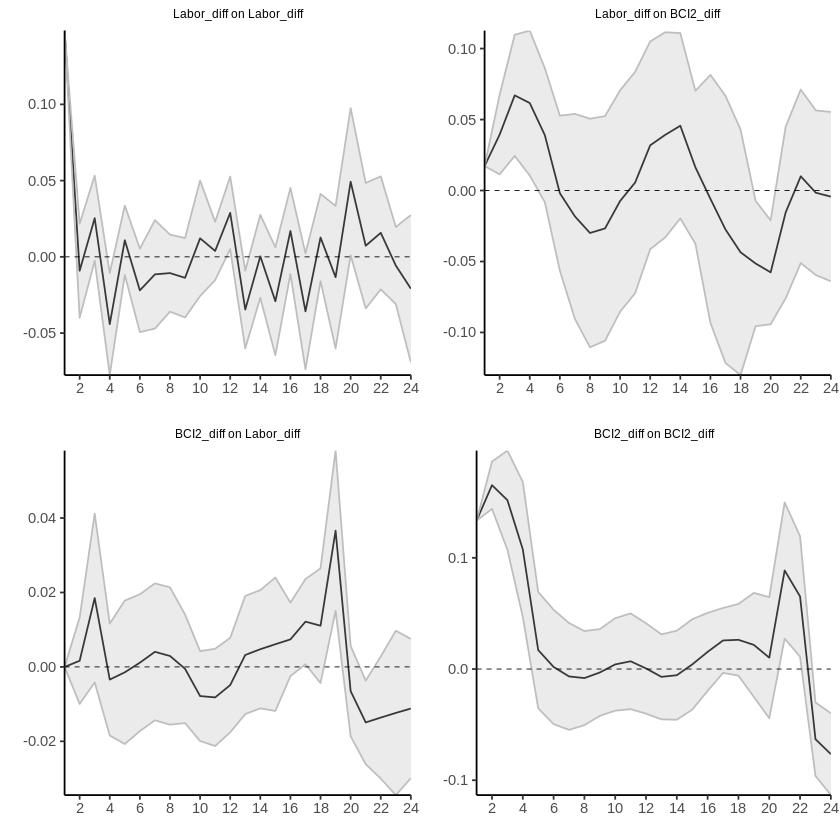

In [ ]:
library(lpirfs)
irf_LP <-lp_lin(endog_data = stationary_data[, c(1, 2)],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 12,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=24,
                    adjust_se=TRUE)

plot(irf_LP)

** Commentaires**

* impact d'un choc sur Labor_diff :
    * le choc est plus persistant sur Labor_diff que avec les fonctions obtenues à partir du VAR (graphiques du haut)
    * l'effet du choc se perpétue dans l'index sur le moyen au long terme, à différence qu'à partir du VAR

impact d'un choc sur BCI2_diff :

* on a un impact du choc sur Labor_diff, durable
* l'impact du choc a peu de différences avec les focntions obteues du VAR

Explication possible : les fonctions impulsion réponse sont estimées en déterminant de façon endogène le nombre de retards pour chaque horizon.
On peut afficher les valeurs de fonctions impulsion-réponse pour les chocs sur Labor_diff (variable 1 du dataframe)

In [ ]:
#valeurs de fonctions impulsion-réponse pour les chocs sur Labor_diff
#(variable 1 du dataframe)
irf_LP$irf_lin_mean[,,1]

0.14836264,-0.009126778,0.02535681,-0.04412658,0.01085683,-0.021979802,-0.01150178,-0.01065257,-0.01374492,0.01214061,⋯,0.01695305,-0.03573023,0.01266534,-0.01333292,0.04928899,0.007296128,0.015748558,-0.005712035,-0.020888357,-0.003226284
0.01723084,0.039400211,0.06701880,0.06162797,0.03903398,-0.001866323,-0.01826015,-0.02992285,-0.02671863,-0.00741226,⋯,-0.00589296,-0.02745594,-0.04351652,-0.05142453,-0.05765659,-0.015385043,0.009999916,-0.001575147,-0.004323696,-0.046025690


In [ ]:
#valeurs de fonctions impulsion-réponse pour les chocs sur BCI2_diff
#(variable 2 du dataframe
irf_LP$irf_lin_mean[,,2]

0.0000000,0.001643422,0.01849752,-0.003401809,-0.001450207,0.001138009,0.004050817,0.002934475,-0.0004975505,-0.007835034,⋯,0.007399222,0.01216058,0.01107335,0.03660301,-0.006505824,-0.01491206,-0.01361461,-0.01236087,-0.01118329,-0.006126494
0.1335131,0.165335020,0.15190972,0.107637296,0.017061501,0.001881260,-0.006640588,-0.008129081,-0.0030951082,0.004165175,⋯,0.015443308,0.02571890,0.02629351,0.02170629,0.010217121,0.08863052,0.06531052,-0.06307106,-0.07655624,-0.078251770


In [ ]:
comp_irf<-data.frame(h=seq(1,12),irf_LP_4l$irf_lin_mean[1,,2],irf$FF[,1])
colnames(comp_irf)<-c('h','LP','VAR')

df_comp<-melt(comp_irf,id.var='h')
p<-ggplot(df_comp,aes(x=h,y=value,col=variable))+geom_line()+
scale_x_discrete(limits=comp_irf$h)
p+labs(title = "Projection locale (12 retards) versus VAR",subtitle = "Effet d'un choc sur le taux sur le taux d'emploi")


ERROR: ignored

In [ ]:

comp_irf<-data.frame(h=seq(1,12),irf_LP_4l$irf_lin_mean[2,,2],irf$FF[,2])
colnames(comp_irf)<-c('h','LP','VAR')

df_comp<-melt(comp_irf,id.var='h')
p<-ggplot(df_comp,aes(x=h,y=value,col=variable))+geom_line()+
scale_x_discrete(limits=comp_irf$h)
p+labs(title = "Projection locale (4 retards) versus VAR",subtitle = "Effet d'un choc sur le taux sur le taux")

ERROR: ignored

In [ ]:
irf_LP$specs$chosen_lags

1
2
2
2
1
2
1
1
1
1
1


**Décomposition de la variance**

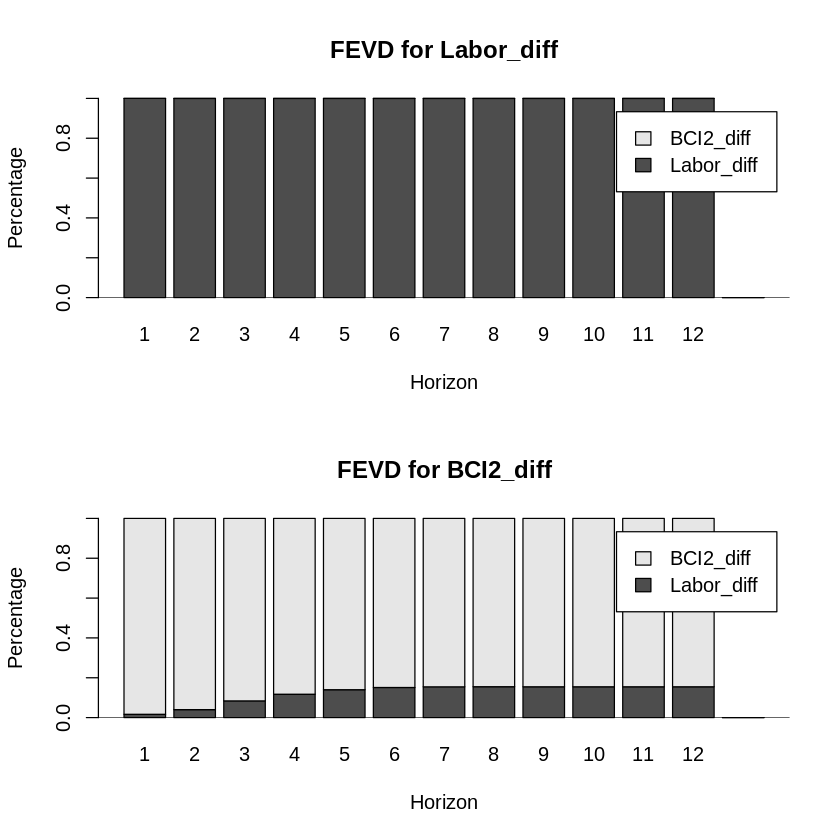

In [ ]:
dec_var <-fevd(var.2lag,n.ahead=12)
plot(dec_var)

La BCI2_diff explique 0% de la variation du taux de croissance de l'emploi.

Néanmoins on constate que après quelques retards,  environ 20% de la variance de BCI2_diff s'explique par les variations de Labor_diff, ce qui est cohérant avec le coefficient significatif au retard 2 qu'on avait obtenu avant.

**Calcul des prévisions**

         Length Class  Mode   
fcst       2    -none- list   
endog    190    -none- numeric
model     10    varest list   
exo.fcst   0    -none- NULL   

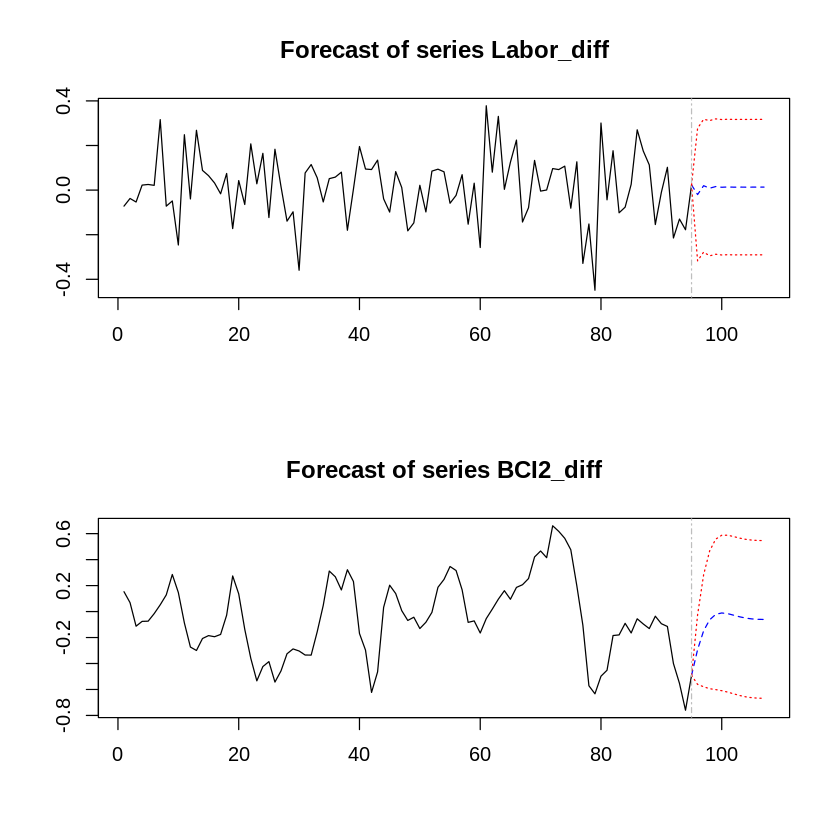

In [ ]:
forecast<-predict(var.2lag,n.ahead = 12, ci=0.95)
summary(forecast)
plot(forecast)

# **9. La cointégration**

La série initiale: On a alors Labor_CL2~ I(1) et BCI2 ~ I(1)+c+T

Pour effectuer le Test de cointégration de Johansen il est préferable d'avoir des séries intégrées d'ordre 1

Nos deux séries sont des processus stationnaires DS, on veut mesurer et estimer l'existence d'une relation de cointégration entre les deux.

**Test de cointégration de Johansen**

*Etape préliminaire: déterminer le nombre de retards pour le test*


In [ ]:
install.packages("tsDyn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deSolve’, ‘mnormt’, ‘tseriesChaos’




In [ ]:
library(dplyr)
join_df<-right_join(Labor_CL2,BCI2)
colnames(join_df)<-c('Date','Emploi','BCI')
str(join_df)
tail(join_df)

Joining with `by = join_by(Date)`


tibble [96 × 3] (S3: tbl_df/tbl/data.frame)
 $ Date  : POSIXct[1:96], format: "2012-01-01" "2012-02-01" ...
 $ Emploi: num [1:96] 62.7 62.6 62.6 62.5 62.5 ...
 $ BCI   : num [1:96] 102 102 102 102 102 ...


Date,Emploi,BCI
<dttm>,<dbl>,<dbl>
2019-07-01,64.22922,98.87642
2019-08-01,64.33142,98.76165
2019-09-01,64.11675,98.36144
2019-10-01,63.98691,97.80834
2019-11-01,63.80920,97.04852
2019-12-01,63.83220,96.55766


In [ ]:
install.packages("reshape")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Représentation graphique des séries jointes

L'axe de l'emploi à été ajusté x1.5 pour mieux comparer l'évolution des deux séries.

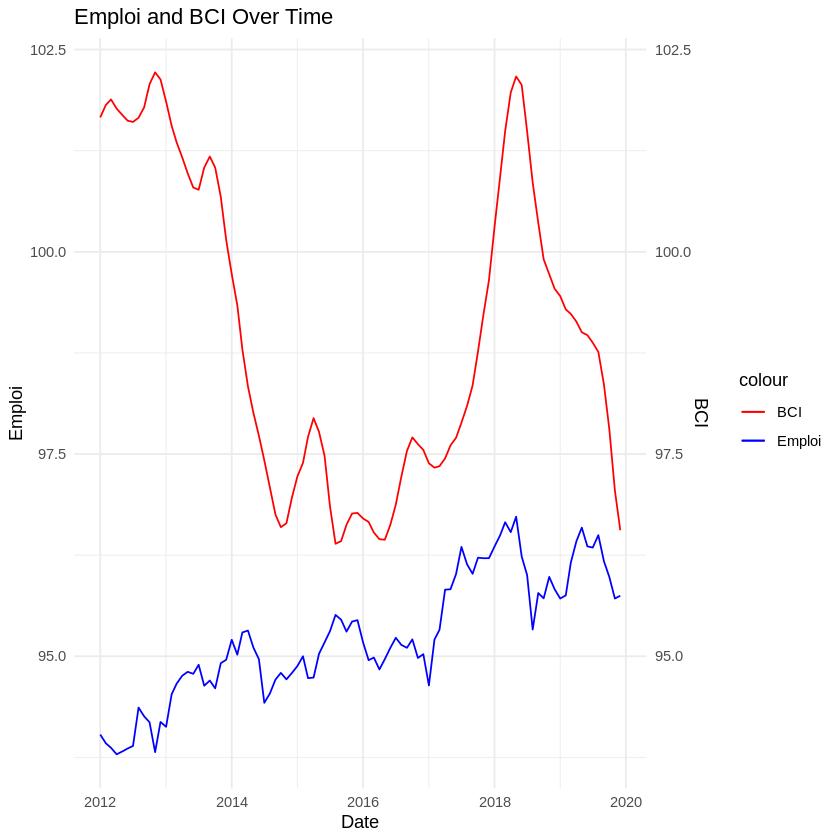

In [ ]:
ggplot(join_df, aes(x = Date)) +
  geom_line(aes(y = Emploi*1.5, color = "Emploi")) +
  geom_line(aes(y = BCI, color = "BCI")) +
  labs(title = "Emploi and BCI Over Time",
       x = "Date",
       y = "Emploi") +
  scale_y_continuous(name = "Emploi",
                     sec.axis = sec_axis(~., name = "BCI")) +
  scale_color_manual(values = c("Emploi" = "blue", "BCI" = "red")) +
  theme_minimal()


On différencie les deux séries originales

Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


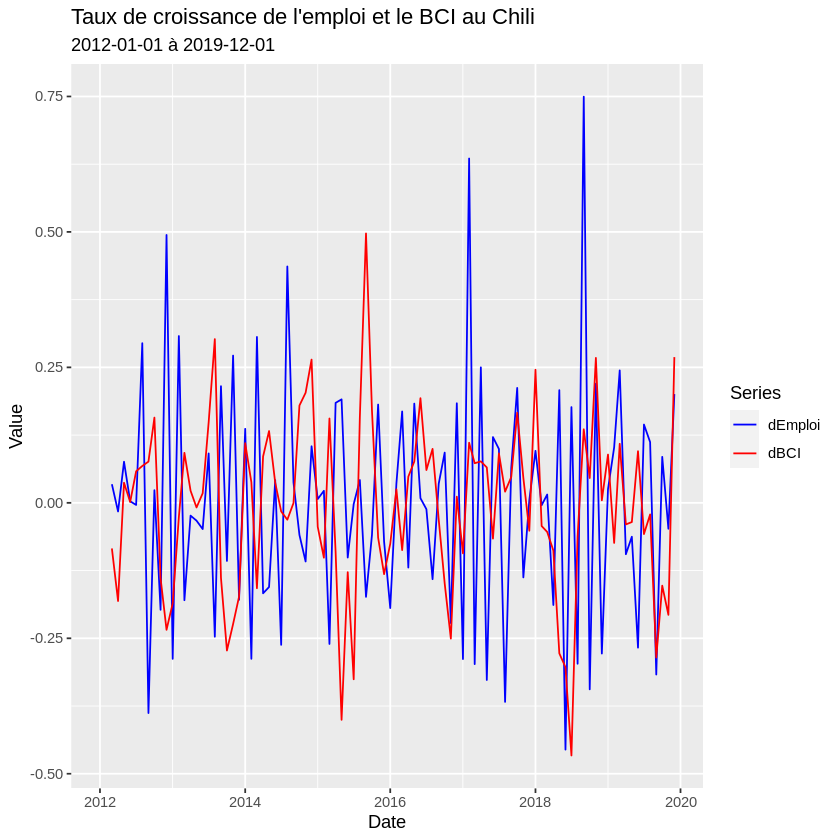

In [ ]:
# Apply diff to Emploi and BCI separately
join_df$dEmploi <- c(NA, diff(join_df$Emploi))
join_df$dBCI <- c(NA, diff(join_df$BCI))

# Create a new dataframe for plotting
data_plot <- join_df[, c("Date", "dEmploi", "dBCI")]

# Melt the data for better ggplot visualization
library(reshape2)
data_melt <- melt(as.data.frame(data_plot), id.vars = "Date")

# Plot the data without secondary axis scaling
library(ggplot2)
plot <- ggplot(data = data_melt, aes(x = Date, y = value, color = variable)) +
  geom_line() +
  scale_color_manual(values = c("dEmploi" = "blue", "dBCI" = "red")) +
  labs(color = "Series", y = "Value", title = "Taux de croissance de l'emploi et le BCI au Chili", subtitle = "2012-01-01 à 2019-12-01")

print(plot)

In [ ]:
library(vars)
diff_df <- data.frame( dEmploi = join_df$dEmploi, dBCI = join_df$dBCI)
diff_df <- na.omit(diff_df)
pselect<-VARselect(y=diff_df[,c('dEmploi','dBCI')],lag.max=24,type=c("const"))
pselect$selection


AIC(n)  HQ(n)  SC(n) FPE(n) 
     4      1      1      4

# Test de la Trace
 Hypothèses du test :

* H0(r) : rang(Π) ≤ r ⇒ il existe au plusrrelations de cointegration
* Ha : rang(Π) > r

Statistique du test de la trace :

Q(r) = -T∑ⁿᵢln(1-̂λᵢ)  ≃ −T∑ⁿᵢ(−λᵢ) = T∑ⁿᵢ(λᵢ)
avec i=r+1

Seuils critiques dans la table du test de cointégration de Johansen. On rejette H0(r) quand Q(r) est supérieur au seuil critique.



In [ ]:
#Test de la trace

library(urca)
labor_bci.vecm<-ca.jo(diff_df,ecdet = "none",spec = "transitory",type = 'trace',K=4)
summary(labor_bci.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend 

Eigenvalues (lambda):
[1] 0.4685261 0.3120097

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 33.66  6.50  8.18 11.65
r = 0  | 90.55 15.66 17.95 23.52

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           dEmploi.l1  dBCI.l1
dEmploi.l1  1.0000000 1.000000
dBCI.l1    -0.1518054 1.859261

Weights W:
(This is the loading matrix)

          dEmploi.l1    dBCI.l1
dEmploi.d  -2.501003 -0.3094744
dBCI.d      1.174541 -0.4620109


On va tester l'hypothèse que le nombre de relation de cointégration est égal à 0 pour un risque de première espèce α = 5%

* H0(0): r = rang(II)<= 0
* Ha(0): r = range(II) > 0

        * Statistique du test: Q(0)= 90.55
        * Seuil de rejet pour un risque de première espèce est: 19.96

On rejette alors Ho(0), Q(0) est supérieur au seuil critique. On passe à l'étape suivante:

* H0(0): r = rang(II)<= 1
* Ha(0): r = range(II) > 1

        * La statistique du test est : Q(1)= -Tln(1-λ2) = 33.66
        * Seuil de rejet pour un risque de première espèce est: 9.24
On rejette l'hypothèse nulle H0 que le nombre de cointégration égale à 1 pour un risque de première espèce de 5% . Il n'existe pas alors une relation de cointégration entre les deux variables.

In [ ]:
#Test de la valeur propre maximale
labor_bci.vecm_eigen<-ca.jo(diff_df,ecdet = "none",spec = "transitory",type = 'eigen',K=4)
summary(labor_bci.vecm_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.4685261 0.3120097

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 | 33.66  6.50  8.18 11.65
r = 0  | 56.89 12.91 14.90 19.19

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           dEmploi.l1  dBCI.l1
dEmploi.l1  1.0000000 1.000000
dBCI.l1    -0.1518054 1.859261

Weights W:
(This is the loading matrix)

          dEmploi.l1    dBCI.l1
dEmploi.d  -2.501003 -0.3094744
dBCI.d      1.174541 -0.4620109


On pose les hypothèses du test:

H0: r = rang(II) = 0
Ha: r = rang(II) = 1

Statistique du test:

Q(0/1) = -T∑ᵢln (1-λᵢ ) =  56.89

Le seuil de rejet du test pour un rique de première espèce de 5% est 14.90 < Q(0/1) . On rejette donc l'hypothèse nulle que le nombre de relations de cointégration est égal à 0 pour un risque de première espèce α = 5%

On passe aux hypothèses suivantes:

* H0(0): r = rang (II) = 1
* Ha(0): r = rang(II) = 2
* Q(1/2) = 33.66
* Seuil de rejet à 5% = 8.18
* Q(1/2) > 8.18
On rejette donc l'hypothèse nulle que le nombre de cointégration est égal à 1% pour un risque de premiere espèce de 5%.

#**Conclusion**

On conclut qu'il n'existe pas une relation de cointégration entre le taux d'emploi et le Business Confidence Index
